**Упражнение 6**

In [1]:
library(ISLR)
library(ggplot2)
library(MASS)
library(class)
library(pROC)
library(ramify)

Type 'citation("pROC")' for a citation.


Присоединяю пакет: ‘pROC’


Следующие объекты скрыты от ‘package:stats’:

    cov, smooth, var



Присоединяю пакет: ‘ramify’


Следующий объект скрыт от ‘package:graphics’:

    clip




# Функции которые я использую на протяжении всего notebook

Получить предсказания перекодированные как 0 или 1 в зависимости от заданной точки отсечения

In [2]:
get_y_hat = function(pred_probs, treshold)
{
    y_hat = rep(1, length(pred_probs))
    y_hat[pred_probs < treshold] = 0
    return(y_hat)
}

По матрице неточностей вычислить долю правлино предсказанных значений 

In [3]:
get_correct_part = function(err_matr)
{
    return ((err_matr[1,1] + err_matr[2,2]) / sum(err_matr))
}

По матрице неточностей вычислить долю ошибочных предсказаний

In [4]:
get_error_part = function(err_matr)
{
    return ((err_matr[2,1] + err_matr[1,2]) / sum(err_matr))
}

# 10

## a

In [5]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

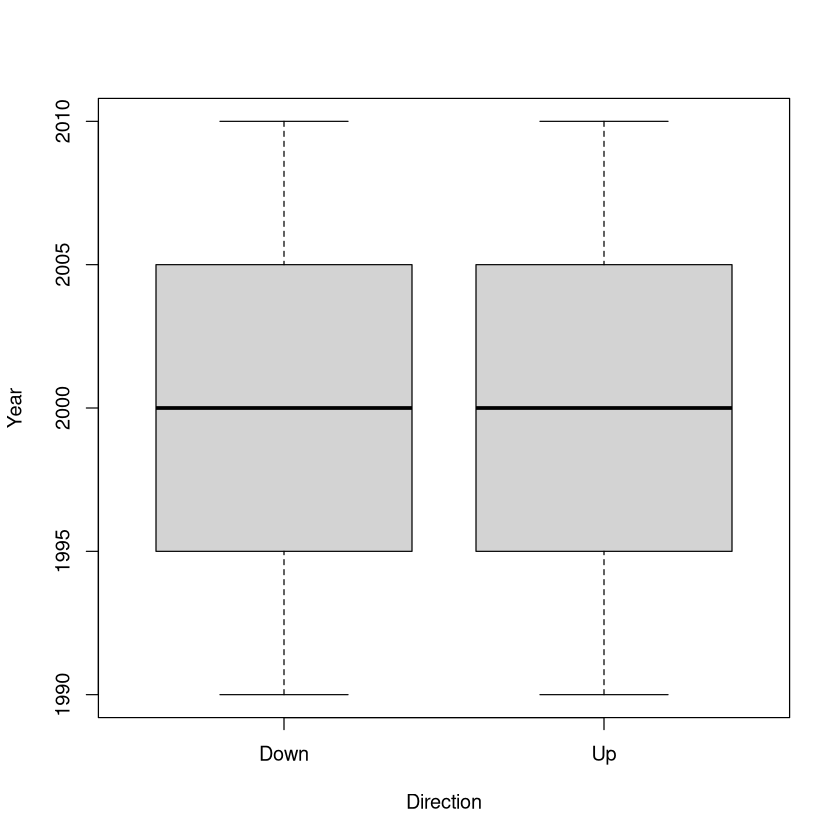

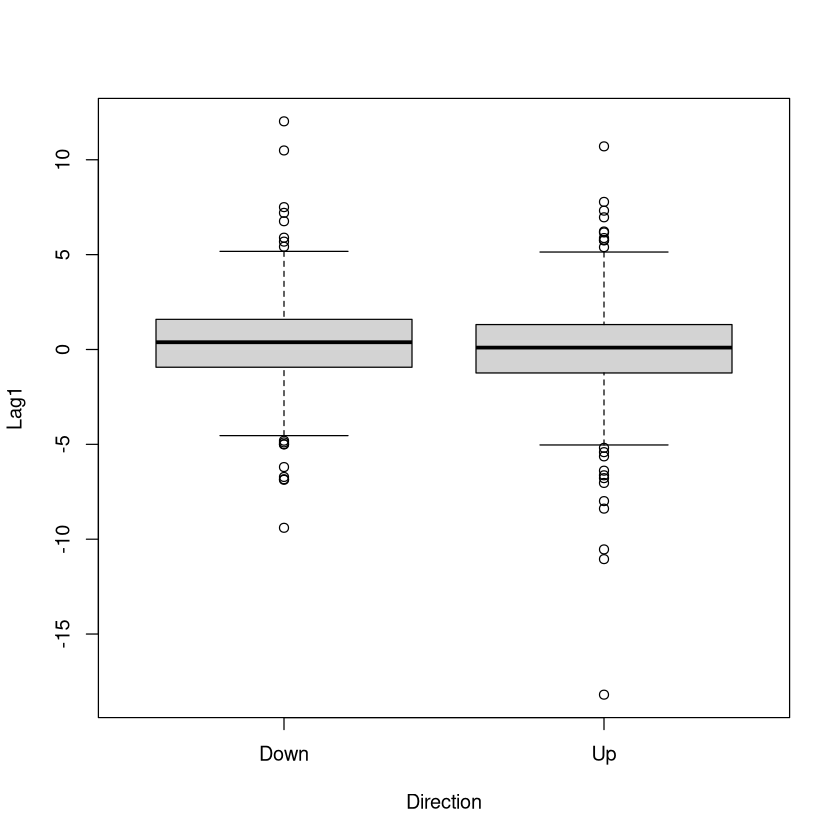

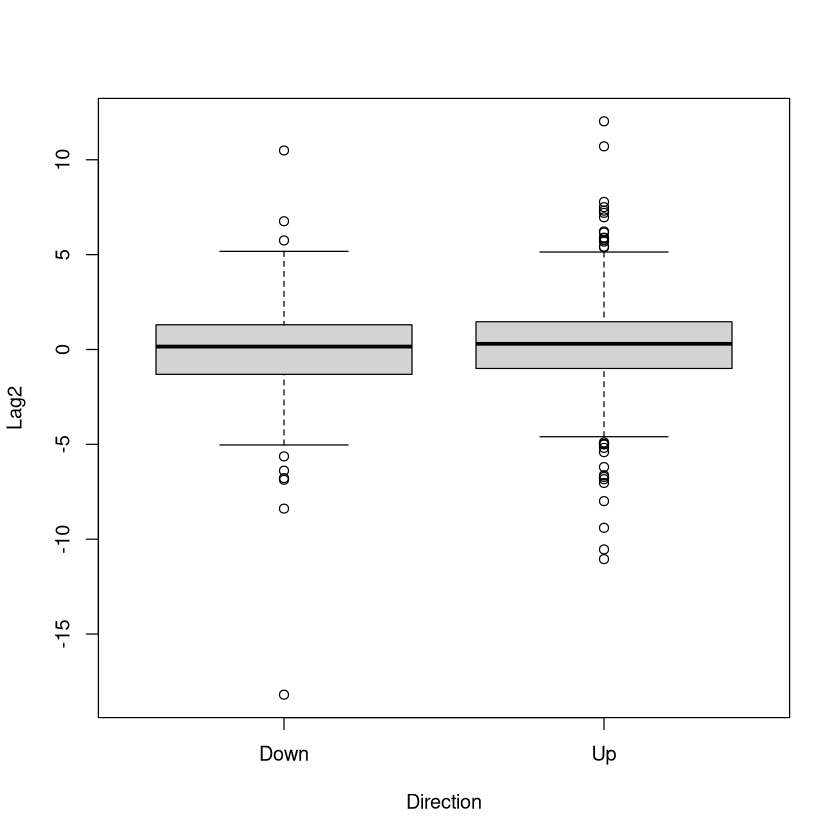

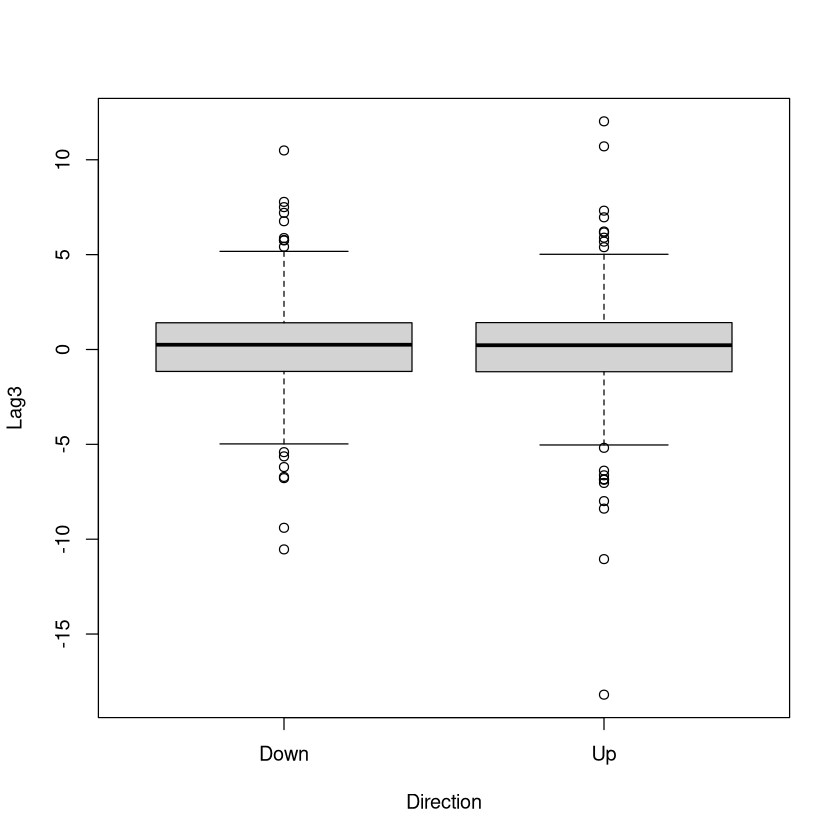

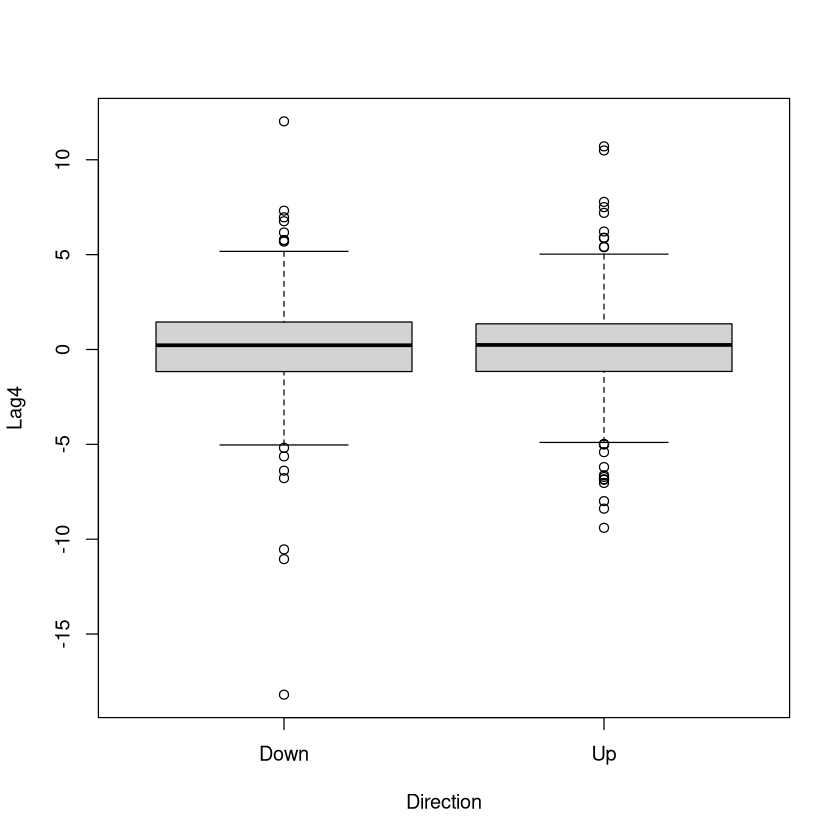

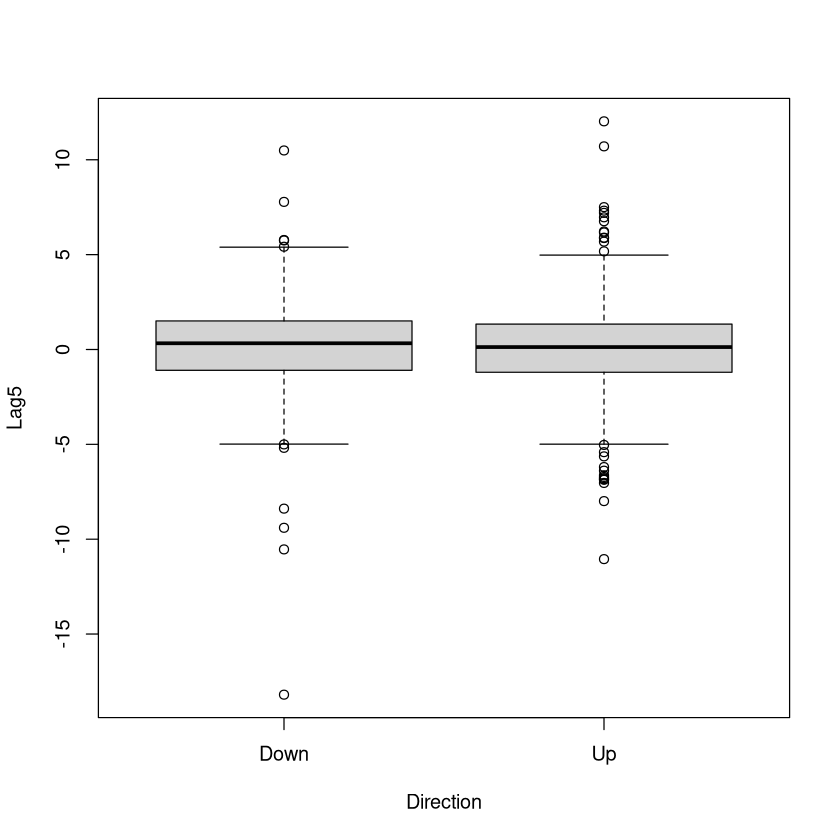

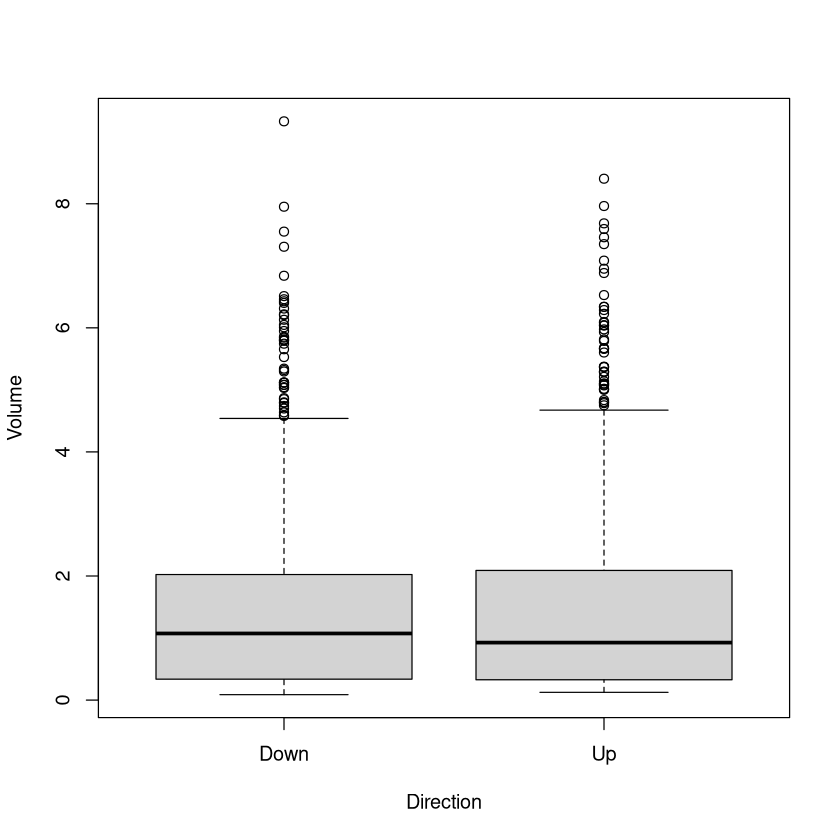

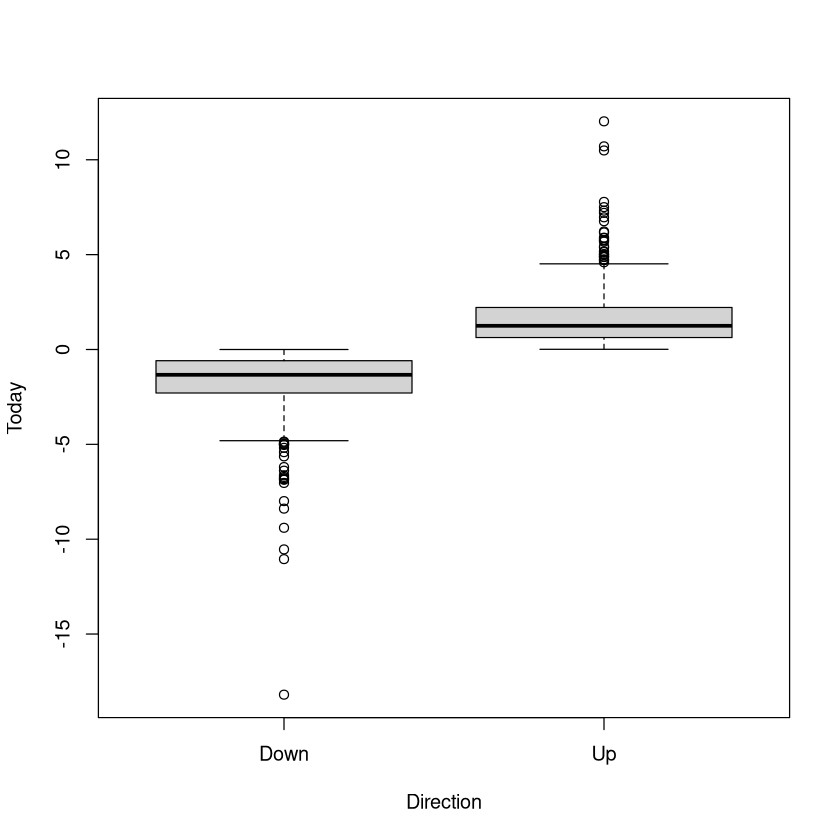

In [6]:
# ggplot(data = Weekly) + geom_boxplot(x = Weekly$Direction, y = Weekly$Year)

for (col in names(Weekly[-ncol(Weekly)])){
    boxplot(
        as.formula(paste(col, "~ Direction")), 
        data = Weekly
    )
}

`Today` похоже напрямую связан с объясняемой переменной - `Up` соотвествует положительному `Today`, `Down` отрицательному `Today`. На остальных грфиках невозможно увидеть каких-либо взаимосвязей.

## б

In [7]:
logit.fit = glm(Direction ~ . - Year - Today, data = Weekly, family = binomial)
summary(logit.fit)


Call:
glm(formula = Direction ~ . - Year - Today, family = binomial, 
    data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Значимых предикторов не оказалось!

In [8]:
logit.pred = predict(logit.fit, type = "response")

Попробуем подобрать более приятную точку отсечения

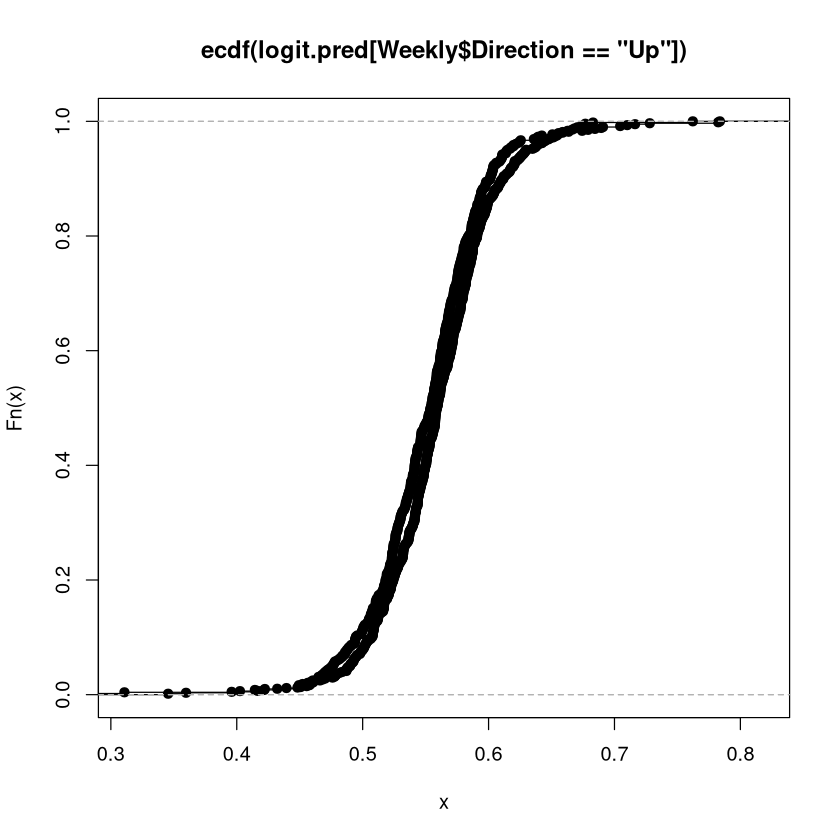

In [9]:
plot(ecdf(logit.pred[Weekly$Direction == "Up"]))
lines(ecdf(logit.pred[Weekly$Direction == "Down"]))

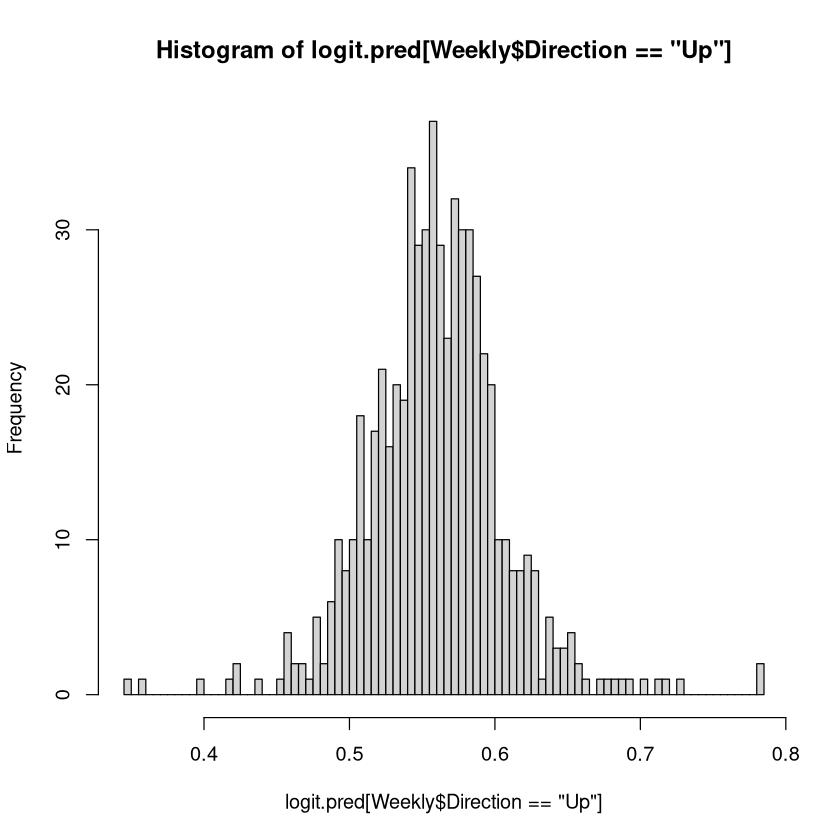

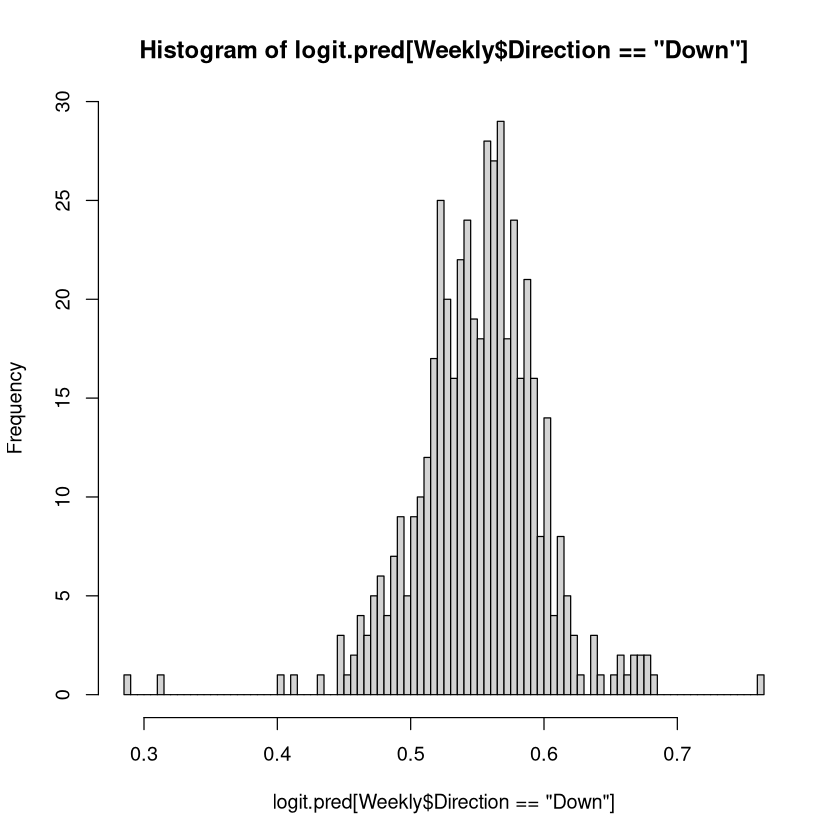

In [10]:
hist(logit.pred[Weekly$Direction == "Up"], breaks = 100)
hist(logit.pred[Weekly$Direction == "Down"], breaks = 100)

In [11]:
err_matr = table(Weekly$Direction, get_y_hat(logit.pred, 0.5))
get_correct_part(err_matr)

[1] 0.5610652

In [12]:
err_matr = table(Weekly$Direction, get_y_hat(logit.pred, 0.55))
get_correct_part(err_matr)

[1] 0.5426997

In [13]:
err_matr = table(Weekly$Direction, get_y_hat(logit.pred, 0.45))
get_correct_part(err_matr)
# (err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

[1] 0.5564738

In [14]:
err_matr = table(Weekly$Direction, get_y_hat(logit.pred, 0.53))
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

[1] 0.5619835

In [15]:
err_matr

      
         0   1
  Down 147 337
  Up   140 465

In [16]:
total_count = apply(err_matr, 1, sum)
apply(err_matr, 2, function(X) {X/total_count})

,0,1
Down,0.303719,0.696281
Up,0.231405,0.768595


Получается так что полученна модель склонна предскзывать рост рынка. Седует попробовать увеличить ее способность работать со спадом рынка.

## d-g

In [17]:
train_cond = Weekly$Year <= 2008

Weekly$intDir = as.integer(replace(
    replace(as.character(Weekly$Direction), as.character(Weekly$Direction) == "Up", 1),
    as.character(Weekly$Direction) == "Down", 0
))

train = Weekly[train_cond,]
test = Weekly[!train_cond,]

nrow(train)
nrow(test)

[1] 985

[1] 104

#### d

In [18]:
logit.model = glm(Direction ~ Lag2 ,train, family = "binomial")
pred_prob = predict(logit.model, test, type = "response")

err_matr = table(test$Direction, get_y_hat(pred_prob, 0.5))
err_matr
get_correct_part(err_matr)
# (err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      
        0  1
  Down  9 34
  Up    5 56

[1] 0.625

In [19]:
auc(as.integer(test$Direction == "Up"), pred_prob)

Setting levels: control = 0, case = 1

Setting direction: controls > cases



Area under the curve: 0.4537

In [20]:
mean(pred_prob[test$intDir== 0])
mean(pred_prob[test$intDir== 1])

[1] 0.5490108

[1] 0.5601351

#### g

In [21]:
lda.model = lda(Direction ~ Lag2, train)
pred_prob = predict(lda.model, test, type = "response")
err_matr = table(test$Direction, pred_prob$class)
err_matr
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      
       Down Up
  Down    9 34
  Up      5 56

[1] 0.625

Ожидаемо результат один в один как у логстической регрессии!

#### f

In [22]:
qda.model = qda(Direction ~ Lag2, train)
pred_prob = predict(qda.model, test, type = "response")
err_matr = table(test$Direction, pred_prob$class)
err_matr
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      
       Down Up
  Down    0 43
  Up      0 61

[1] 0.5865385

Интерестно получилось... Всем предсказало подъем рынка попробуем понять почему так!

Загрузка требуемого пакета: carData



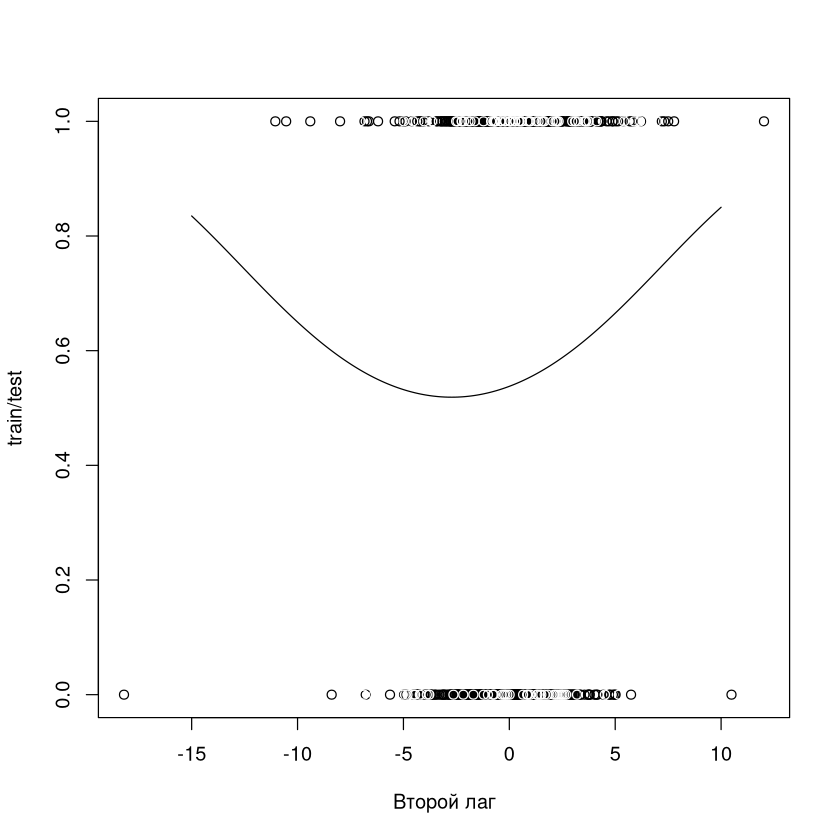

In [23]:
library(car)

plot(
    Weekly$Lag2, Weekly$intDir, 
    col = train_cond,
    xlab = "Второй лаг",
    ylab = "train/test"
)

predict.plot.df = data.frame(
    Lag2 = seq(-15,10, 0.1)
)
lines(predict.plot.df$Lag2, predict(qda.model, predict.plot.df)$posterior[,2])

В самом деле там где наблюдается концентрация спадов рынка вероятность таки предсказывается пониже однако не падает ниже 0.5! Тут точно следует поработать с точной отечения, это может привести к повышению мощности алгоритма

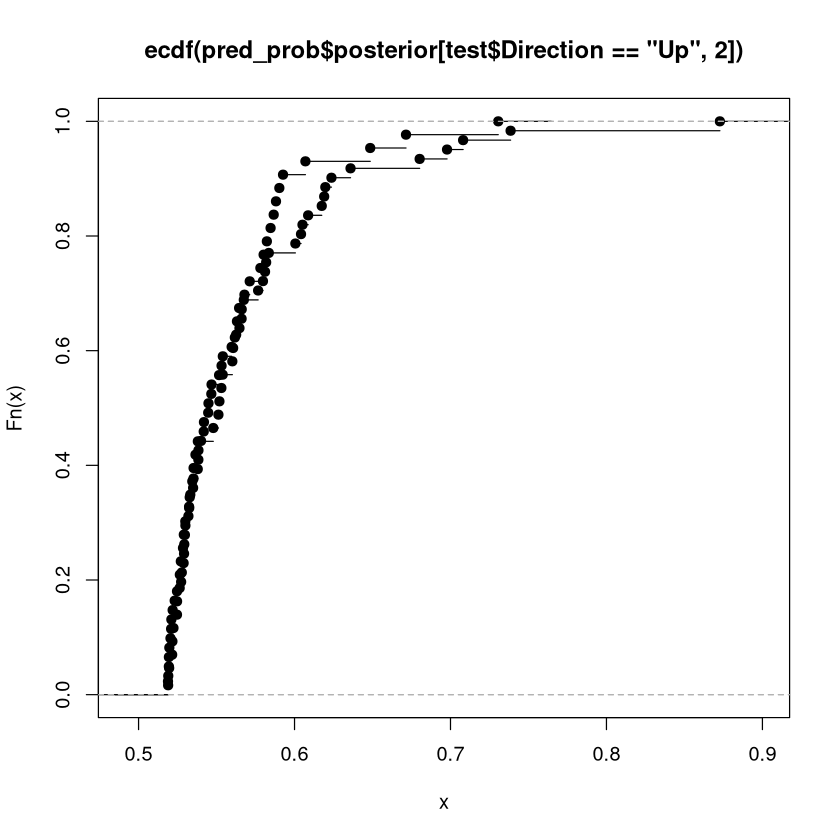

In [24]:
plot(ecdf(pred_prob$posterior[test$Direction == "Up", 2]))
lines(ecdf(pred_prob$posterior[test$Direction == "Down", 2]))

Максимальная разница достигается в районе 0.6. Это разделение может дать лучшие результаты.

In [25]:

err_matr = table(test$Direction, get_y_hat(pred_prob$posterior[, 2], 0.6))
err_matr
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      
        0  1
  Down 39  4
  Up   47 14

[1] 0.5096154

Лучше не стало...

#### g

In [26]:
knn1_pred = knn(train["Lag2"], test["Lag2"], train$Direction, k = 1)

In [27]:
err_matr = table(test$Direction, knn1_pred)
err_matr
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      knn1_pred
       Down Up
  Down   21 22
  Up     29 32

[1] 0.5096154

Ожидаемо ненастроенный knn едва-ли лучше случайного угадывания!

## h

В ограничениях предыдущих пунктов лучше всего сработали линейные медоты (logit и lda)

## i

#### Для начала данные подлежат более подробному исследованию

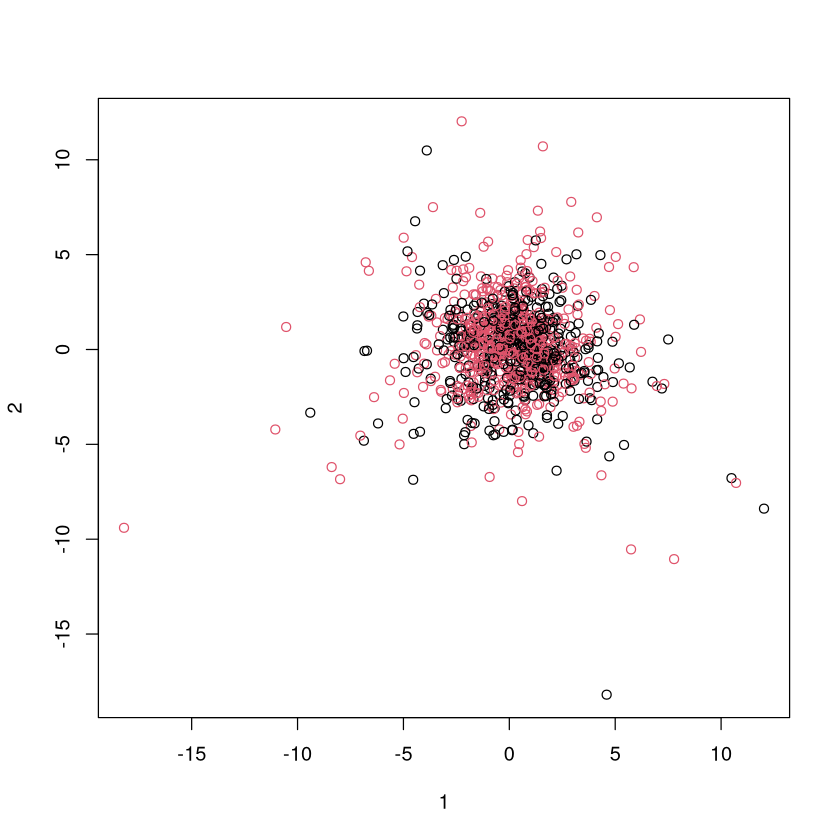

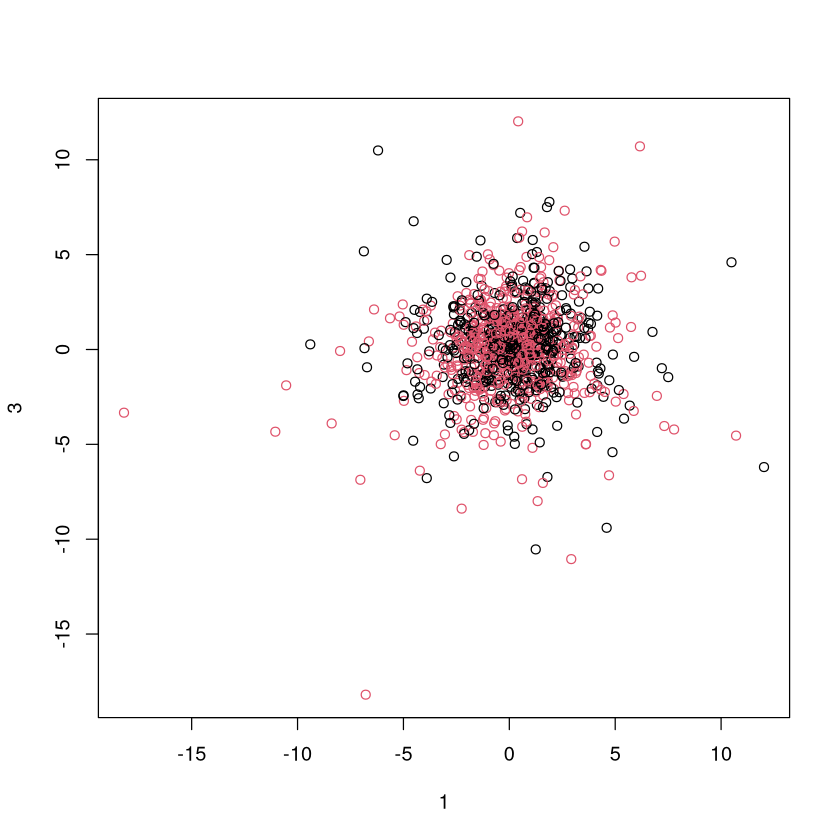

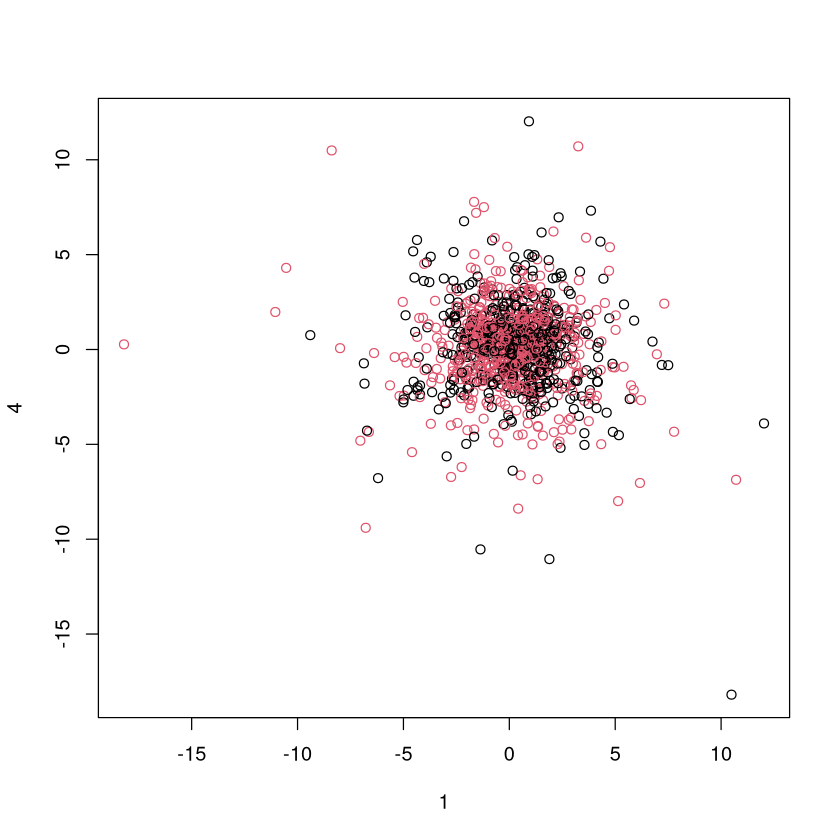

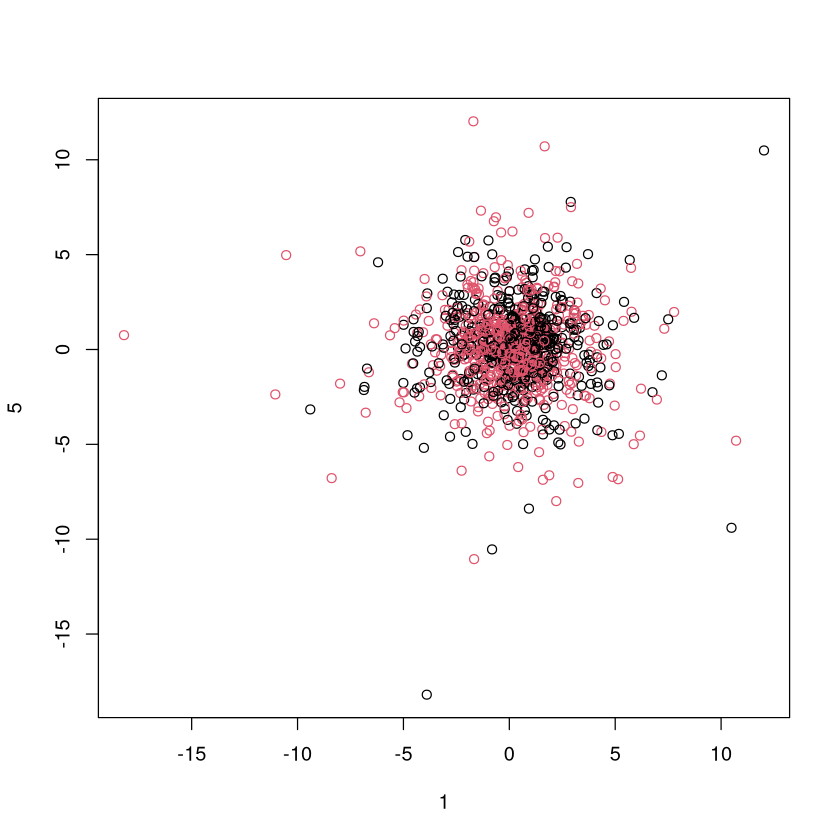

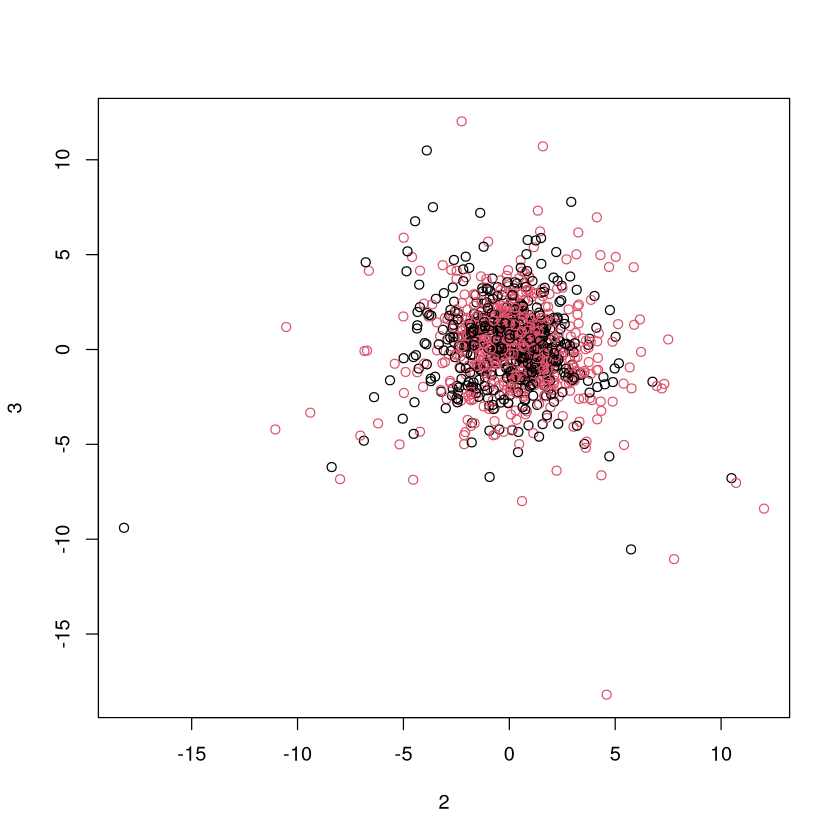

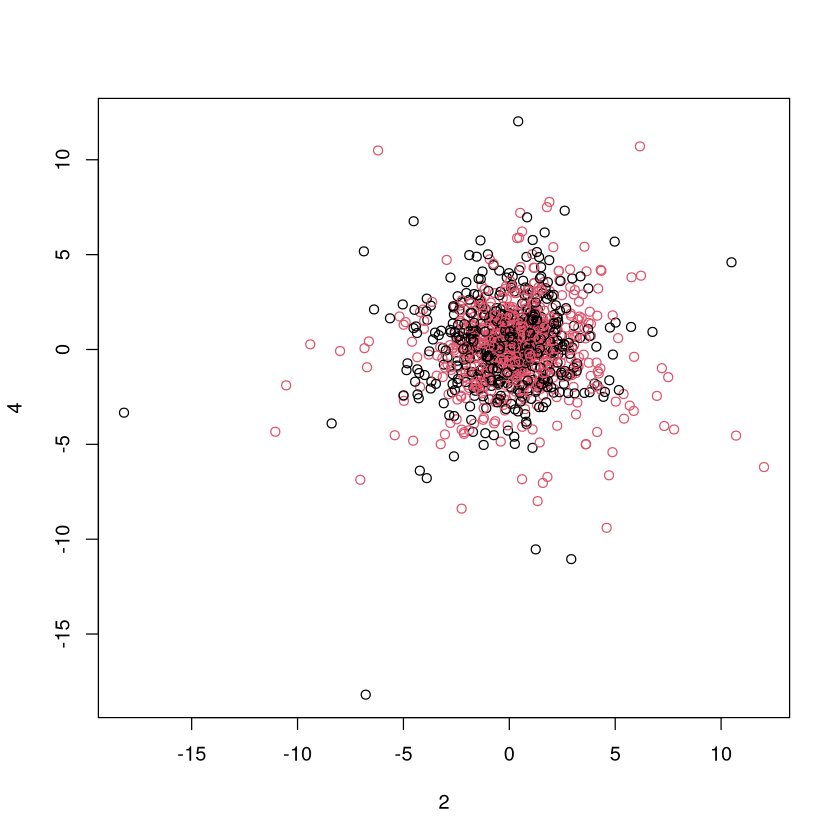

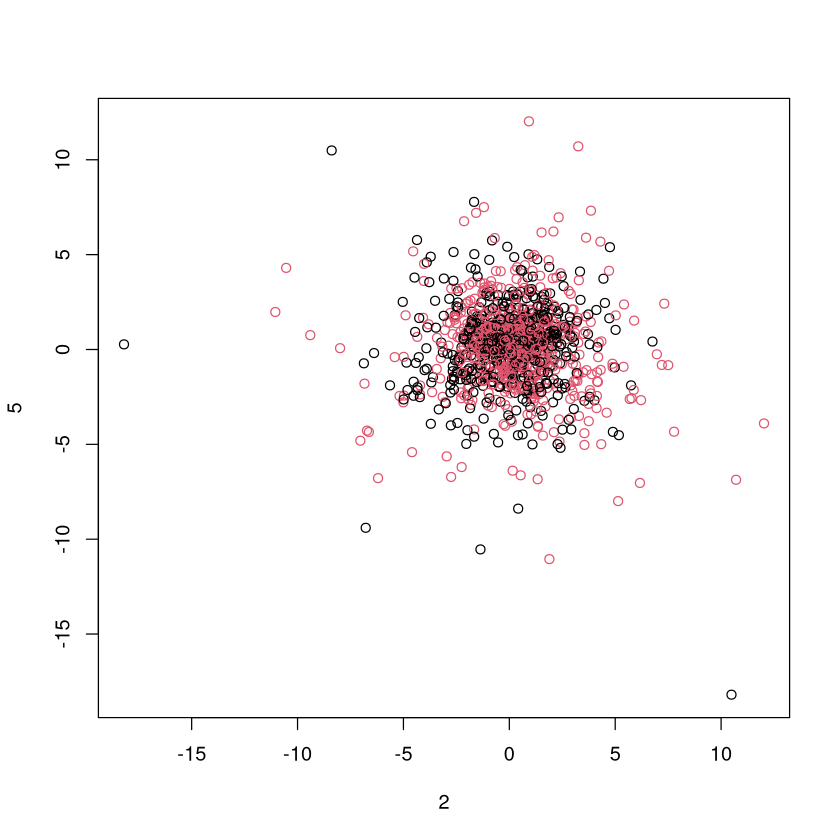

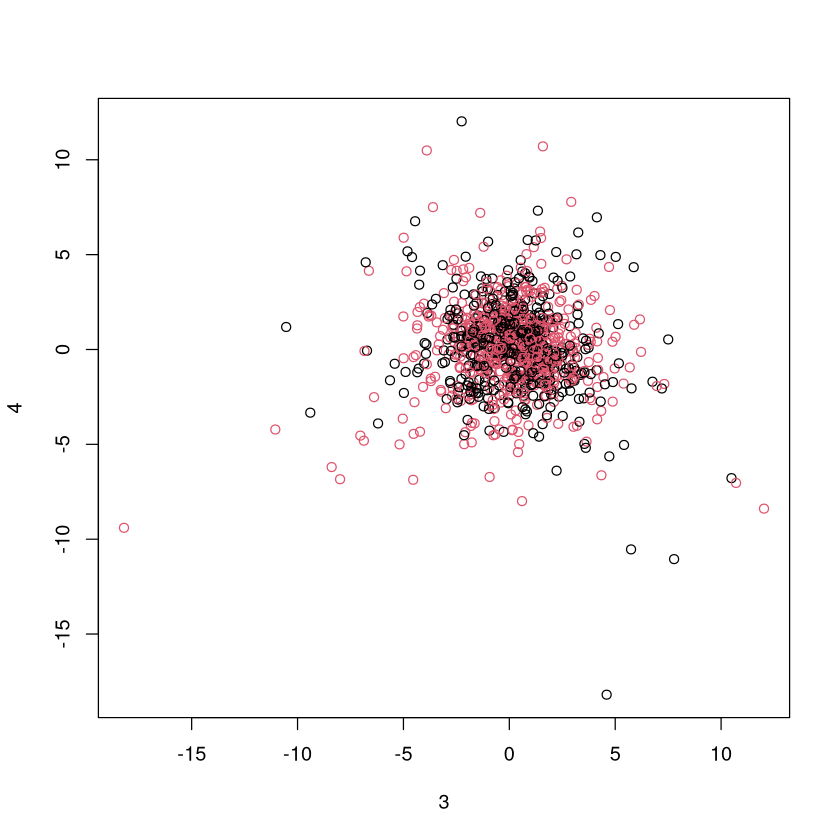

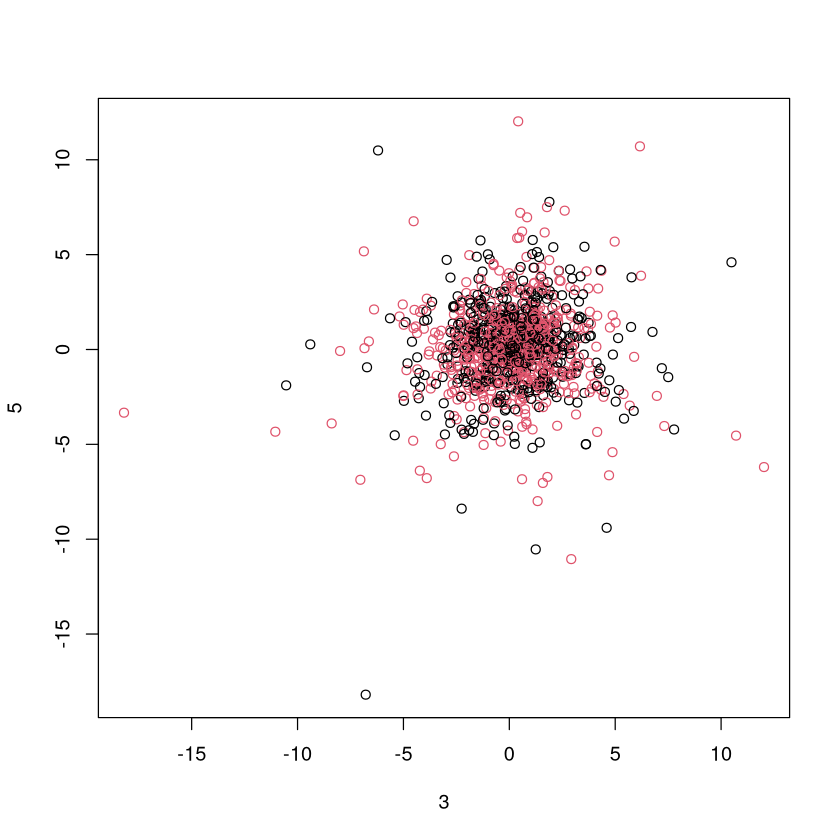

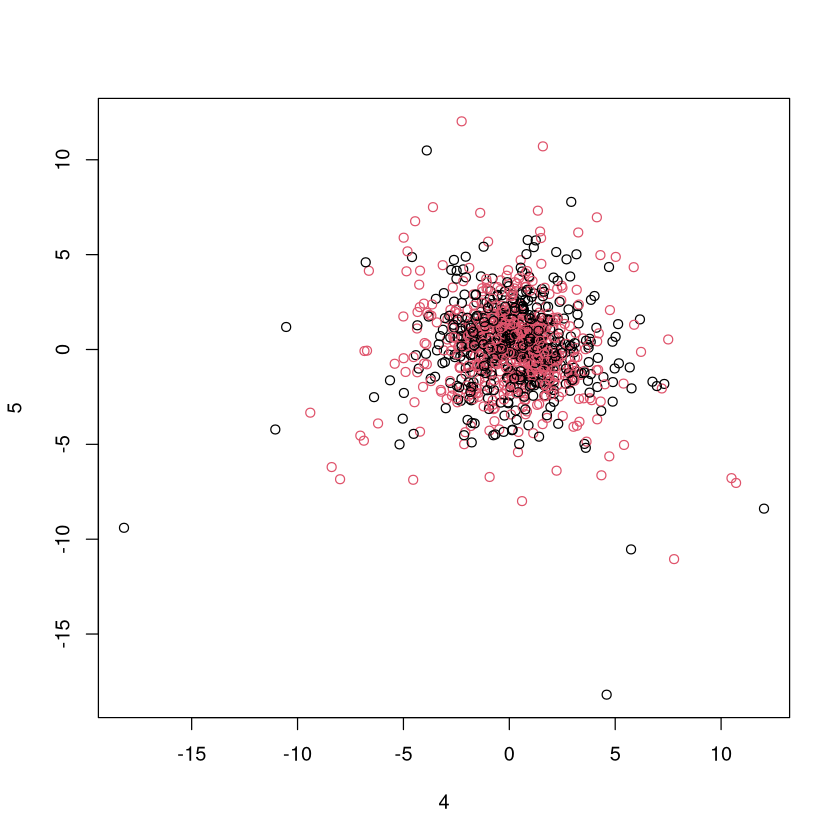

In [28]:
for (i in 1:5)
{
    for (j in i:5){
        if (i != j){
            plot(
                Weekly[paste("Lag", as.character(i), sep = "")][,1], 
                Weekly[paste("Lag", as.character(j), sep = "")][,1], 
                col = Weekly$Direction,
                xlab = as.character(i), ylab = as.character(j)
            )
        }
    }
}

Но еще же есть `volume`!

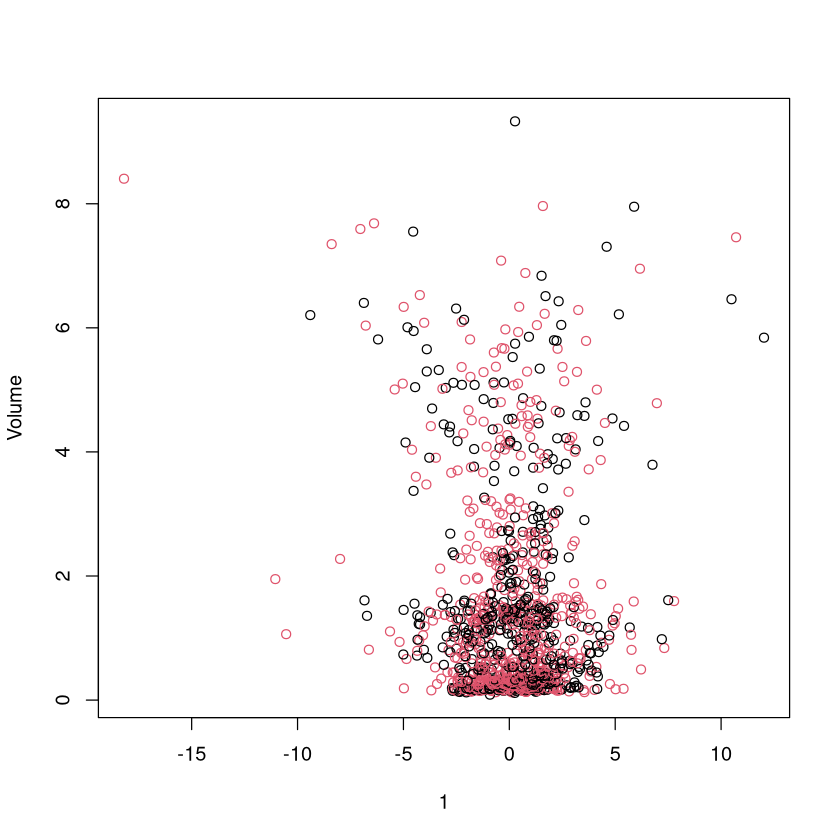

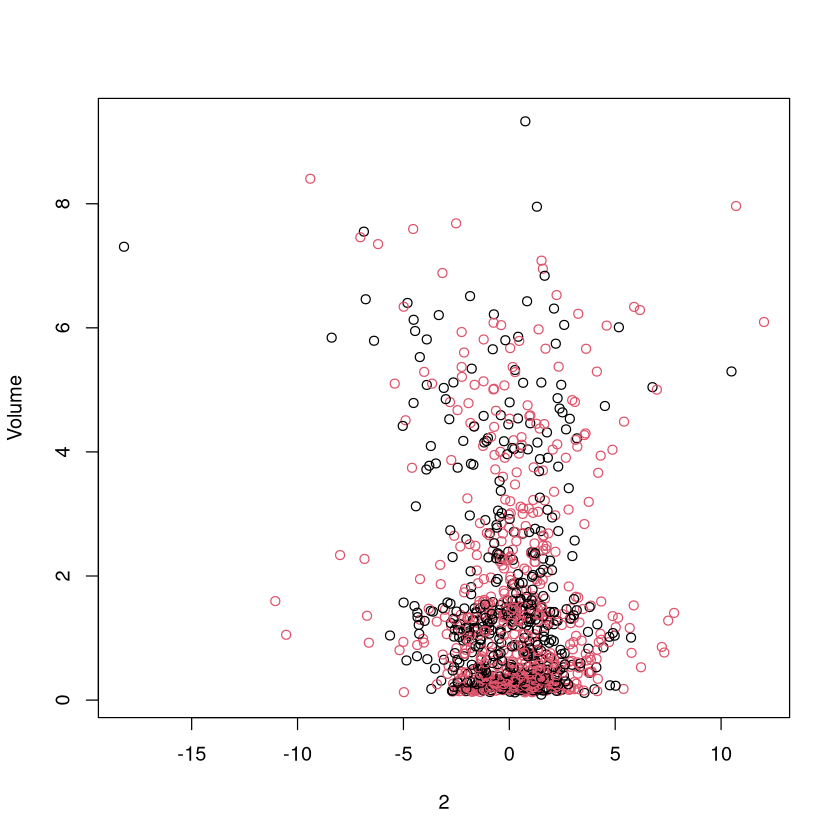

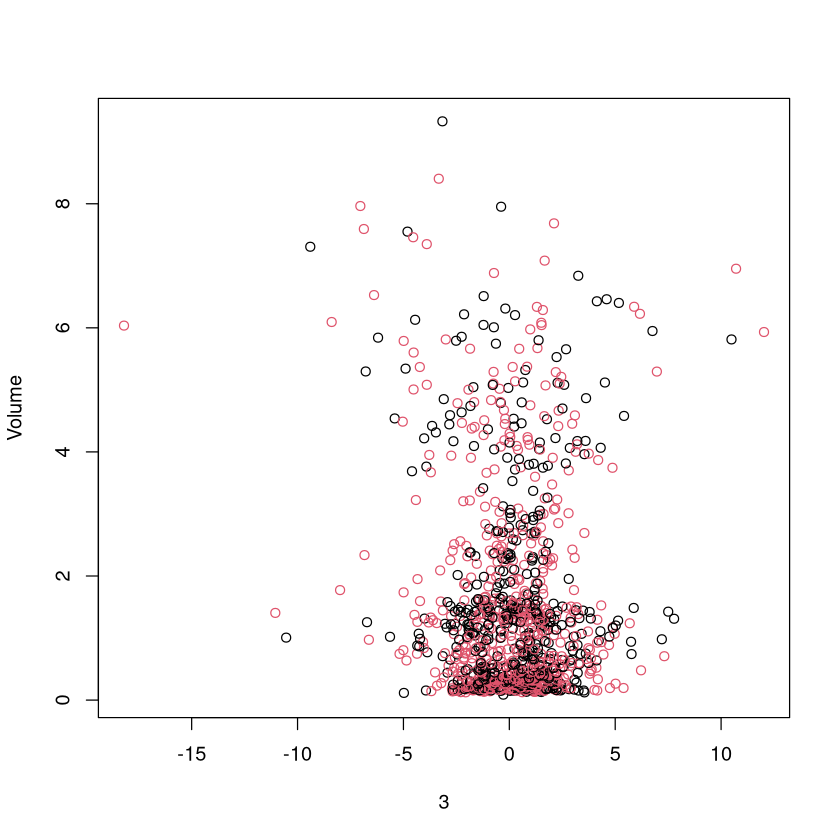

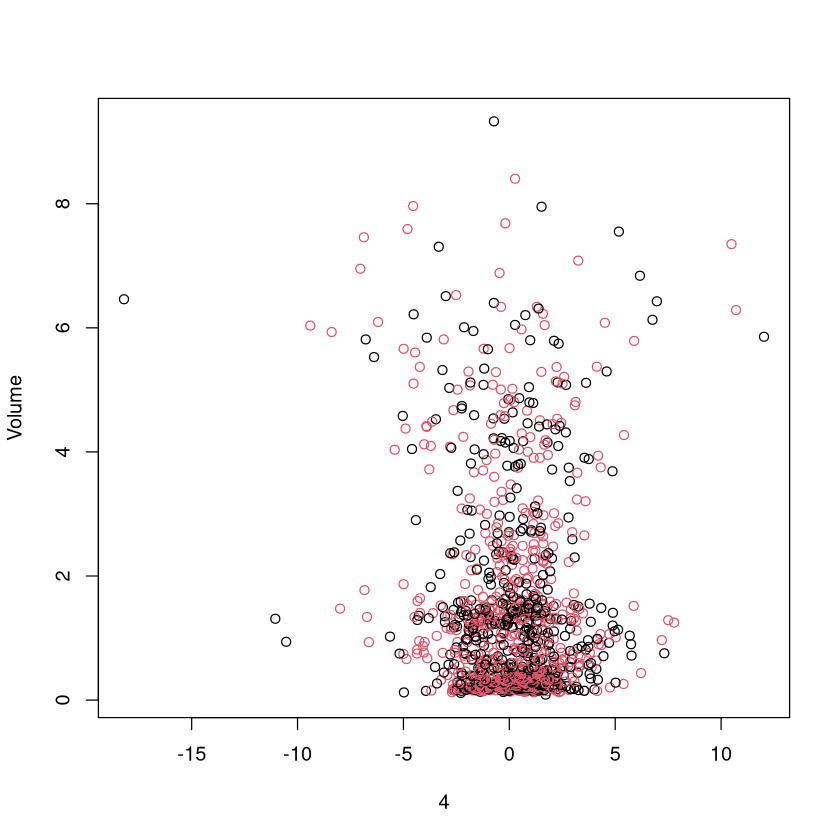

In [29]:
for (i in 1:5)
{
    if (i != j){
        plot(
            Weekly[paste("Lag", as.character(i), sep = "")][,1], 
            Weekly$Volume, 
            col = Weekly$Direction,
            xlab = as.character(i), ylab = "Volume"
        )
    }
}

Короче судя по диограммам рассеяния все эти показатели не очень

#### Попробуем посмотреть может предыдущее направление указывает на настоящее направление?

In [30]:
Weekly.shift1 = Weekly[2:nrow(Weekly),]
Weekly.shift1['prev.day'] = Weekly$Direction[1:(nrow(Weekly)-1)]

train_cond = (Weekly.shift1$Year <= 2008)

train.shift1 = Weekly.shift1[train_cond,]
test.shift1 = Weekly.shift1[!train_cond,]

In [31]:
abs_tab = table(
    Weekly.shift1[,"Direction"], 
    Weekly.shift1[,"prev.day"], 
    dnn = c("Dir", "PrevDir")
)
abs_tab
prop.table(abs_tab)

      PrevDir
Dir    Down  Up
  Down  195 288
  Up    289 316

      PrevDir
Dir         Down        Up
  Down 0.1792279 0.2647059
  Up   0.2656250 0.2904412

Построение логит регрессии на этом показателе

In [32]:
summary(glm(Direction~prev.day, Weekly.shift1, family = "binomial"))


Call:
glm(formula = Direction ~ prev.day, family = "binomial", data = Weekly.shift1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.348  -1.217   1.016   1.138   1.138  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.39343    0.09267   4.245 2.18e-05 ***
prev.dayUp  -0.30065    0.12339  -2.437   0.0148 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1488.6  on 1086  degrees of freedom
AIC: 1492.6

Number of Fisher Scoring iterations: 4


Попробуем построить модель только на этой переменной

In [33]:
logit.model.pd = glm(Direction ~ prev.day, train.shift1, family = "binomial")
print("==============model summary=====================")
summary(logit.model.pd)


print("=============model AUC====================")
test.shift1["logit.prev.day.p_hat"] = predict(
    logit.model.pd, 
    test.shift1, 
    type = "response"
)

auc(
    test.shift1$Direction,
    test.shift1$logit.prev.day.p_hat
)

[1] "==============model summary====================="



Call:
glm(formula = Direction ~ prev.day, family = "binomial", data = train.shift1)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.351  -1.204   1.013   1.151   1.151  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.39980    0.09715   4.115 3.87e-05 ***
prev.dayUp  -0.33716    0.12966  -2.600  0.00931 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1353.1  on 983  degrees of freedom
Residual deviance: 1346.3  on 982  degrees of freedom
AIC: 1350.3

Number of Fisher Scoring iterations: 4


[1] "=============model AUC===================="


Setting levels: control = Down, case = Up

Setting direction: controls < cases



Area under the curve: 0.4956

#### Lag2 и направление в предыдущий день

Показатель можно допустить - попробуем построить различные модели на двух показателях, что казались значимыми в передыдущих экспериментах.

In [34]:
logit.model.pd.Lag2 = glm(
    Direction~ prev.day + Lag2, 
    train.shift1, 
    family = "binomial"
)
summary(logit.model.pd.Lag2)


Call:
glm(formula = Direction ~ prev.day + Lag2, family = "binomial", 
    data = train.shift1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6019  -1.2287   0.9797   1.1029   1.4139  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.38543    0.09756   3.951 7.79e-05 ***
prev.dayUp  -0.32241    0.13008  -2.478   0.0132 *  
Lag2         0.05462    0.02888   1.891   0.0586 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1353.1  on 983  degrees of freedom
Residual deviance: 1342.7  on 981  degrees of freedom
AIC: 1348.7

Number of Fisher Scoring iterations: 4


In [35]:
train_cond = (Weekly.shift1$Year <= 2008)

train = Weekly.shift1[train_cond,]
test = Weekly.shift1[!train_cond,]

In [36]:
test.shift1["p_hat"] = predict(
    logit.model.pd.Lag2, test.shift1, type = "response"
)
train.shift1["p_hat"] = predict(
    logit.model.pd.Lag2, train.shift1, type = "response"
)
auc(test.shift1$Direction, test.shift1$p_hat)

Setting levels: control = Down, case = Up

Setting direction: controls < cases



Area under the curve: 0.5478

In [37]:
err_matr = table(
    test.shift1$Direction, 
    get_y_hat(test.shift1$p_hat, 0.5)
)
err_matr
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      
        0  1
  Down  6 37
  Up    7 54

[1] 0.5769231

#### KKN на Lag2 - более тонка подгонка

In [38]:
knn.model = knn(
    train["Lag2"], test["Lag2"], 
    train$Direction, k = 5, prob = TRUE
)

[1] "K что приводит к наивысшему AUC составило  31"


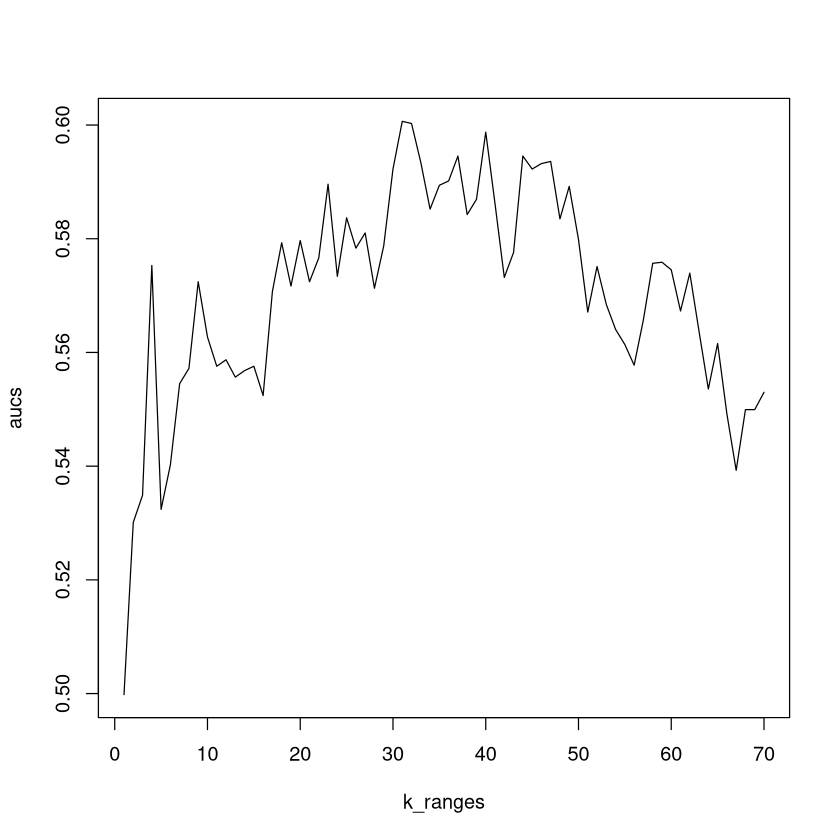

In [39]:
aucs = c()
k_ranges = 1:70

for (k in k_ranges)
{
    knn.model = caret::knn3(train["Lag2"], train$Direction, k = k)
    knn.test.p_hat = predict(knn.model, test["Lag2"])
    aucs = c(
        aucs, 
        auc(
            as.integer(test$Direction == "Up"), 
            knn.test.p_hat[, 2], 
            quiet = TRUE
        )
    )
}

plot(k_ranges, aucs, type = "l")
print(paste(
    "K что приводит к наивысшему AUC составило ", 
    as.character(argmax(as.matrix(aucs), rows = FALSE))
))

In [40]:
err_matr = table(
    knn(train["Lag2"], test["Lag2"], train$Direction, k = 31),
    test$Direction,
    dnn = c("Dir", "PrevDir")
)

err_matr
(err_matr[1,1] + err_matr[2,2]) / sum(err_matr)

      PrevDir
Dir    Down Up
  Down   19 24
  Up     24 37

[1] 0.5384615

AUC выше эвереста но ошибка выше чем у логит регрессии - что-то не так следует поработать с подбором точки отсечения.

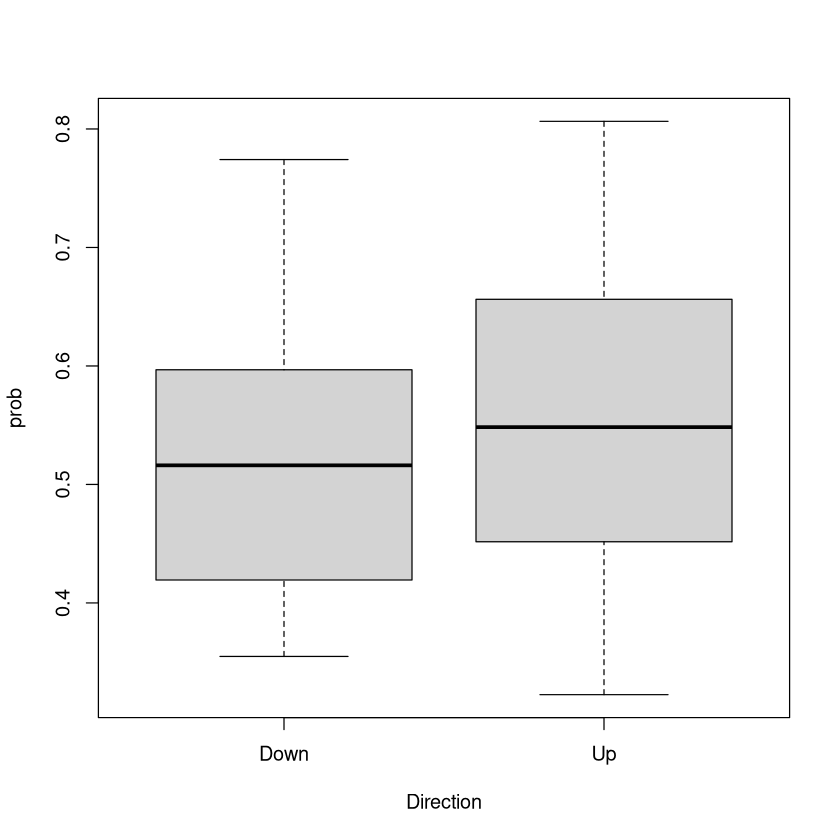

In [41]:
knn31 = caret::knn3(train["Lag2"], train$Direction, k = 31)
knn31.test.prob = predict(knn31, test["Lag2"])[,2]
# knn31.test.prob[test$Direction == "Up"]
boxplot(
    prob ~ Direction, 
    data.frame(
        Direction = test$Direction, 
        prob = knn31.test.prob
    )
)

In [42]:
threshold = 0.4
table(test$Direction, get_y_hat(knn31.test.prob, threshold))
get_correct_part(
    table(test$Direction, get_y_hat(knn31.test.prob, threshold))
)

      
        0  1
  Down  8 35
  Up    4 57

[1] 0.625

In [43]:
tresholds_range = seq(0.35, 0.7, 0.001)

correct_part_range = lapply(tresholds_range, function(x) {
    get_correct_part(
        table(test$Direction, get_y_hat(knn31.test.prob, x))
    )
})

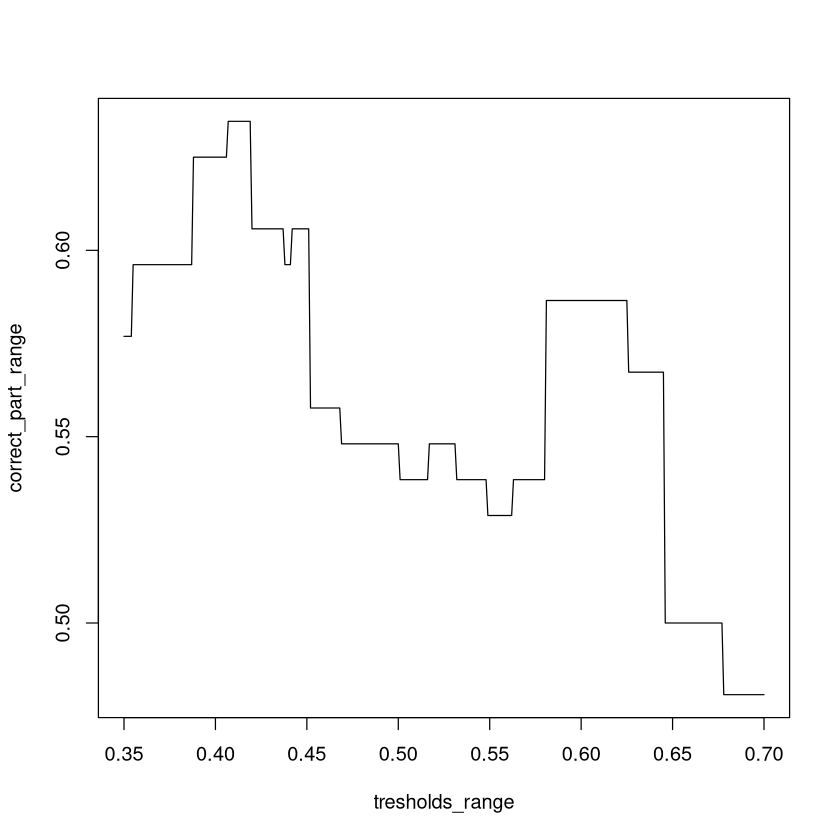

In [44]:
plot(tresholds_range, correct_part_range, type = "l")

#### Вывод

В целом другими методами так и не удалось переплюнуть результаты логистической регрессии! Но последний KNN смог добиться тойже точности классификаци на тестовой выборке. На этом исследование заканчиваю.

# 11

### a)

In [45]:
Auto["mpg01"] = rep(0, nrow(Auto))
Auto[Auto$mpg > median(Auto$mpg), "mpg01"] = 1

Auto$mpg01 = as.factor(Auto$mpg01)
Auto$origin = as.factor(Auto$origin)
Auto$cylinders = as.factor(Auto$cylinders)

head(Auto)
summary(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0


      mpg        cylinders  displacement     horsepower        weight    
 Min.   : 9.00   3:  4     Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   4:199     1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   5:  3     Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   6: 83     Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   8:103     3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60             Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                         
  acceleration        year       origin                  name     mpg01  
 Min.   : 8.00   Min.   :70.00   1:245   amc matador       :  5   0:196  
 1st Qu.:13.78   1st Qu.:73.00   2: 68   ford pinto        :  5   1:196  
 Median :15.50   Median :76.00   3: 79   toyota corolla    :  5          
 Mean   :15.54   Mean   :75.98           amc gremlin       :  4          
 3rd Qu.:17.02   3rd Qu.:79.00        

### b)

In [46]:
table(Auto$cylinders, Auto$mpg01)
table(Auto$origin, Auto$mpg01)

   
      0   1
  3   3   1
  4  20 179
  5   1   2
  6  72  11
  8 100   3

   
      0   1
  1 173  72
  2  14  54
  3   9  70

4 цилинда прочти наверняка указывают на высокий расход топлива!

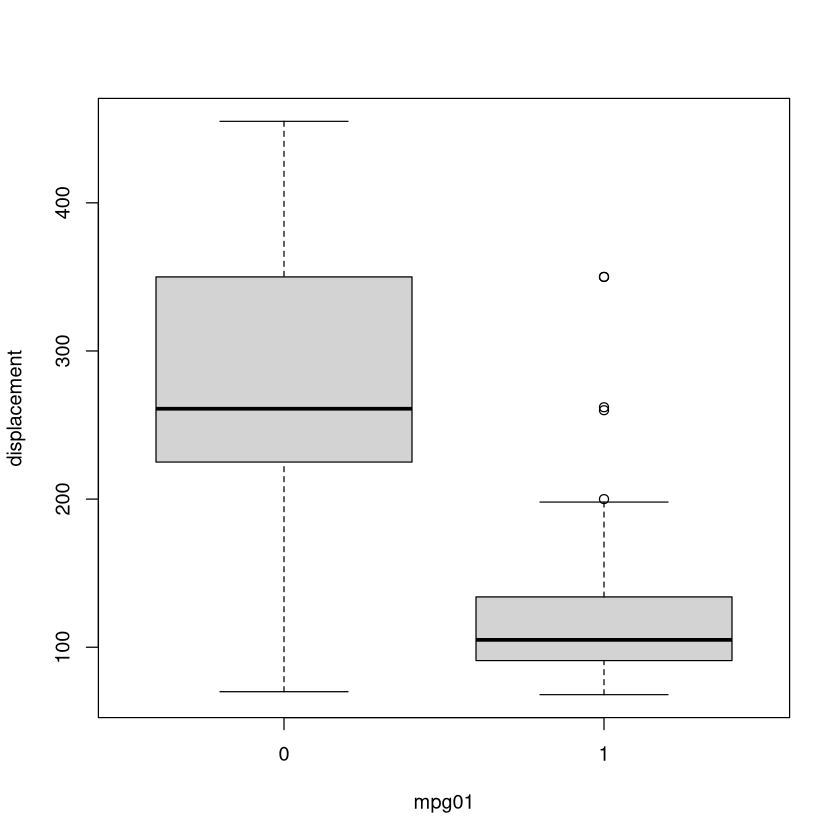

In [47]:
boxplot(displacement ~ mpg01, Auto)

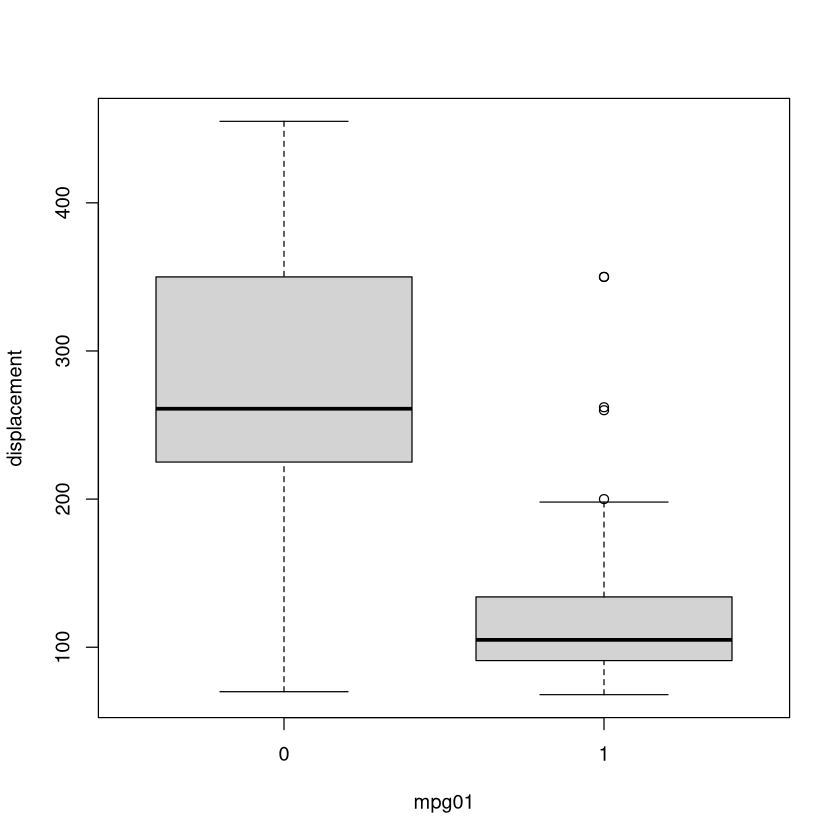

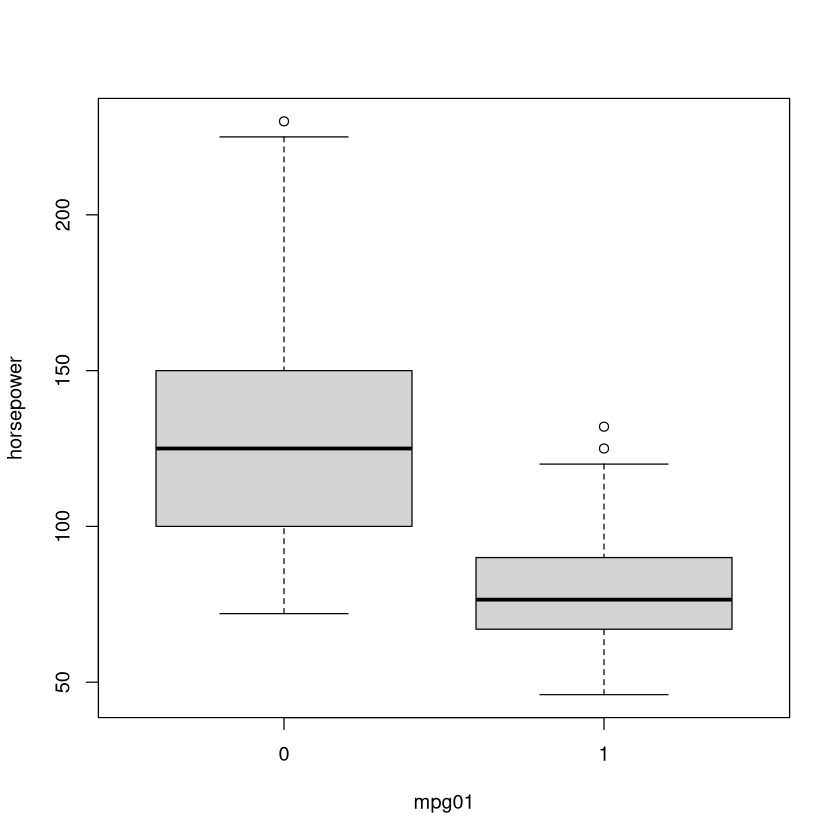

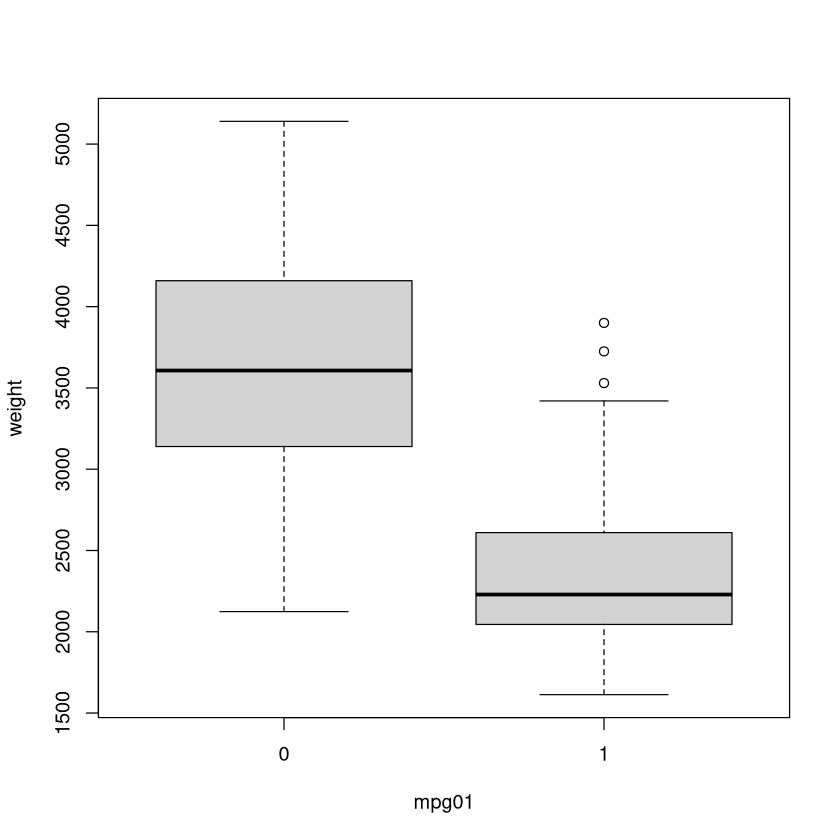

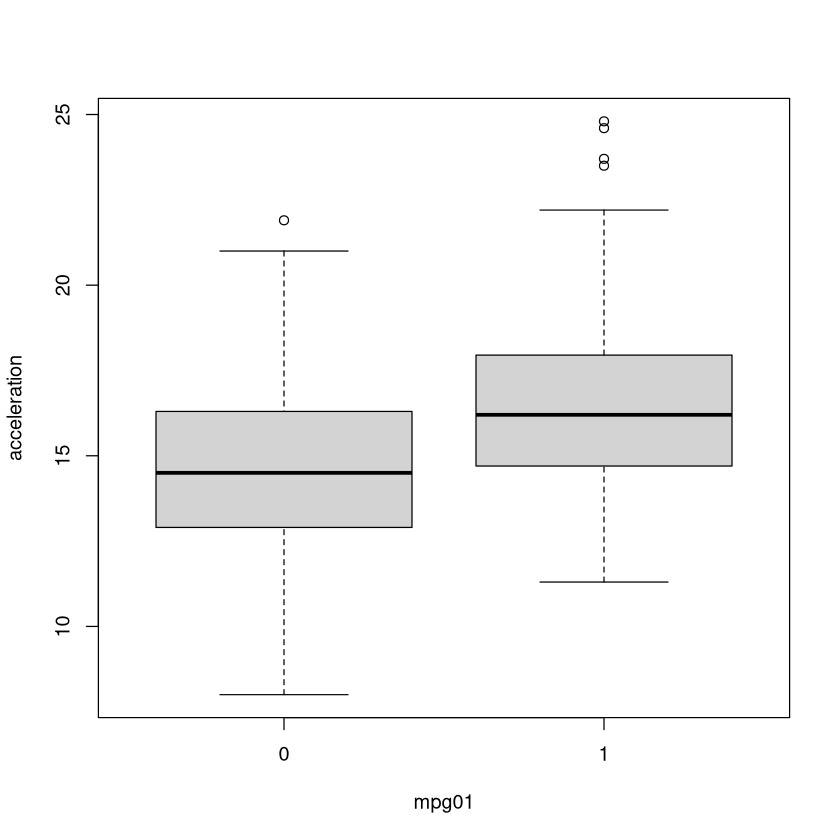

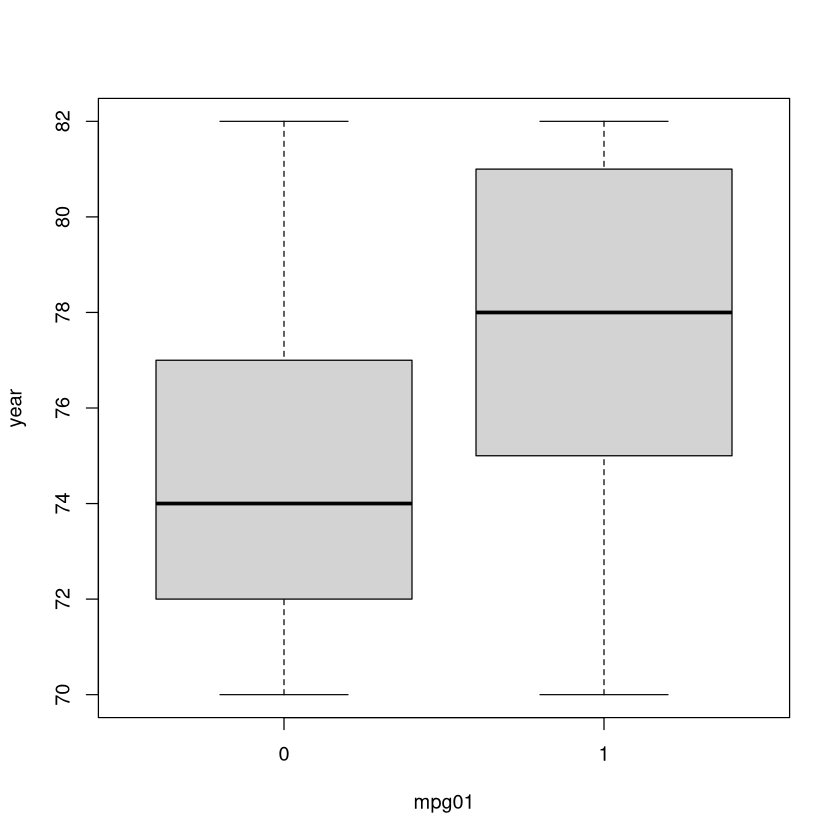

In [48]:
for (col_name in names(Auto)[3:7])
{
    boxplot(as.formula(paste(col_name, "~ mpg01")), Auto)
}

Да почти любой предиктор позволяет в некоторой мере разделить машины с высоким потреблением и никим, но следует быть котовым к тому, что некоторые из них будут имень связь.

### с)

In [49]:
nrow(Auto)*0.75

[1] 294

In [50]:
train_ind <- sample(seq_len(nrow(Auto)), size = nrow(Auto)*0.75)

train = Auto[train_ind,]
test = Auto[-train_ind,] 

### d)

In [51]:
lda.model = lda(mpg01 ~ as.integer(cylinders) + displacement + year, train)
lda_predict = predict(lda.model, test)$class

err_matr = table(
    test$mpg01,
    lda_predict
)

print("полученная матрица неточностей")
err_matr
print("доля ошибок соствила")
get_error_part(err_matr)

[1] "полученная матрица неточностей"


   lda_predict
     0  1
  0 40  5
  1  1 52

[1] "доля ошибок соствила"


[1] 0.06122449

### e)

In [52]:
qda.model = qda(mpg01 ~ as.integer(cylinders) + displacement + year, train)
qda_predict = predict(qda.model, test)$class

err_matr = table(
    test$mpg01,
    qda_predict
)

print("полученная матрица неточностей")
err_matr
print("доля ошибок соствила")
get_error_part(err_matr)

[1] "полученная матрица неточностей"


   qda_predict
     0  1
  0 40  5
  1  1 52

[1] "доля ошибок соствила"


[1] 0.06122449

### f)

In [53]:
logit.model = glm(
    mpg01 ~ as.integer(cylinders) + displacement + year, 
    train, family = "binomial"
)

logit.predict = predict(logit.model, test, type = "response")
logit.y_hat = as.integer(logit.predict > 0.5)

err_matr = table(
    test$mpg01,
    logit.y_hat
)
err_matr

print("полученная матрица неточностей")
err_matr
print("доля ошибок соствила")
get_error_part(err_matr)

   logit.y_hat
     0  1
  0 40  5
  1  2 51

[1] "полученная матрица неточностей"


   logit.y_hat
     0  1
  0 40  5
  1  2 51

[1] "доля ошибок соствила"


[1] 0.07142857

### g)

In [54]:
features_vector = c("cylinders", "displacement", "year")

[1] "K что приводит к маименьшей ошибке  7"


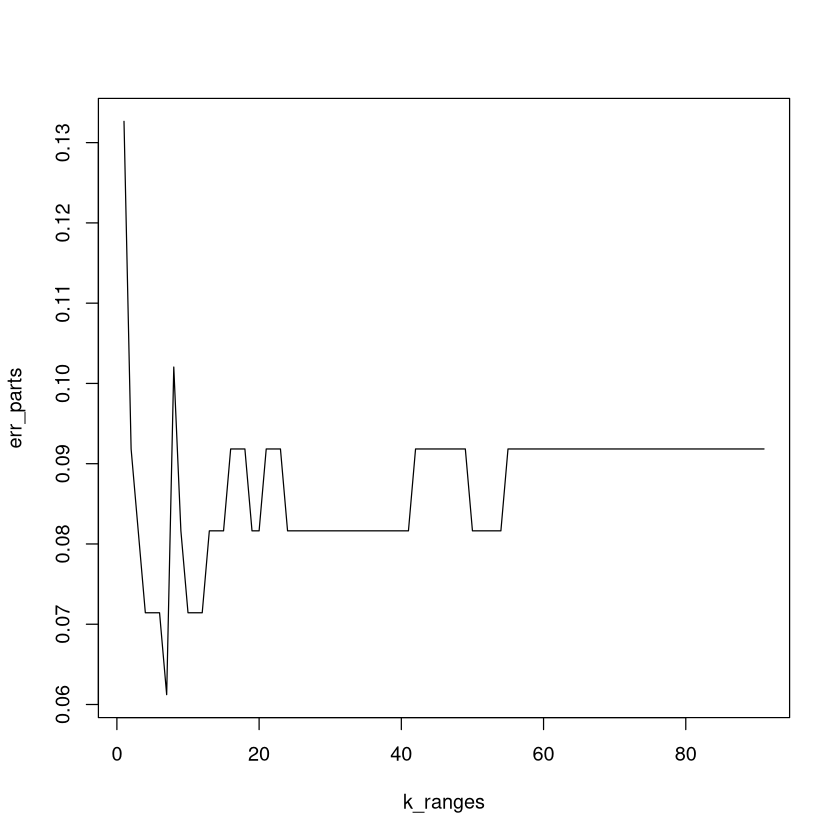

In [55]:
err_parts = c()
k_ranges = 1:91

for (k in k_ranges)
{
    knn.predict = knn(
        train[features_vector], test[features_vector],
        train$mpg01, k = k
    )

    err_matr = table(
        test$mpg01,
        knn.predict
    )
    
    err_parts = c(err_parts, get_error_part(err_matr))
}

plot(k_ranges, err_parts, type = "l")
print(paste(
    "K что приводит к маименьшей ошибке ", 
    as.character(argmin(as.matrix(err_parts), rows = FALSE))
))

In [56]:
knn.predict = knn(
    train[features_vector], test[features_vector],
    train$mpg01, k = 23
)

err_matr = table(
    test$mpg01,
    knn.predict
)

err_matr
get_error_part(err_matr)

   knn.predict
     0  1
  0 38  7
  1  2 51

[1] 0.09183673

Похоже, что любое $K \geq 23$ дает один и тот же результат на поставленной задаче

# 12

### a)

In [57]:
power = function()
{
    print(2^3)
}

power()

[1] 8


### b)

In [58]:
power2 = function(x,a)
{
    print(x^a)
}

power2(12,2)
power2(3,8)

[1] 144
[1] 6561


### c)

In [59]:
power2(10,3)
power2(8,17)
power2(131,3)

[1] 1000
[1] 2.2518e+15
[1] 2248091


### d)

In [60]:
power3 = function(x)
{
    return(x^2)
}

power3(5)

[1] 25

### e)

In [61]:
sqrt(10)

[1] 3.162278

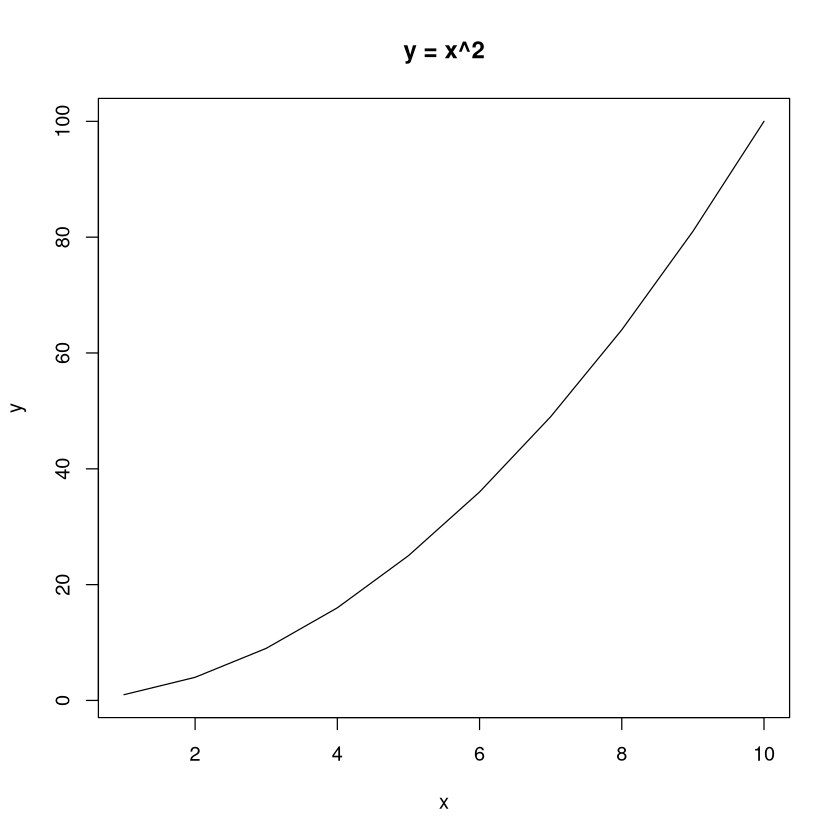

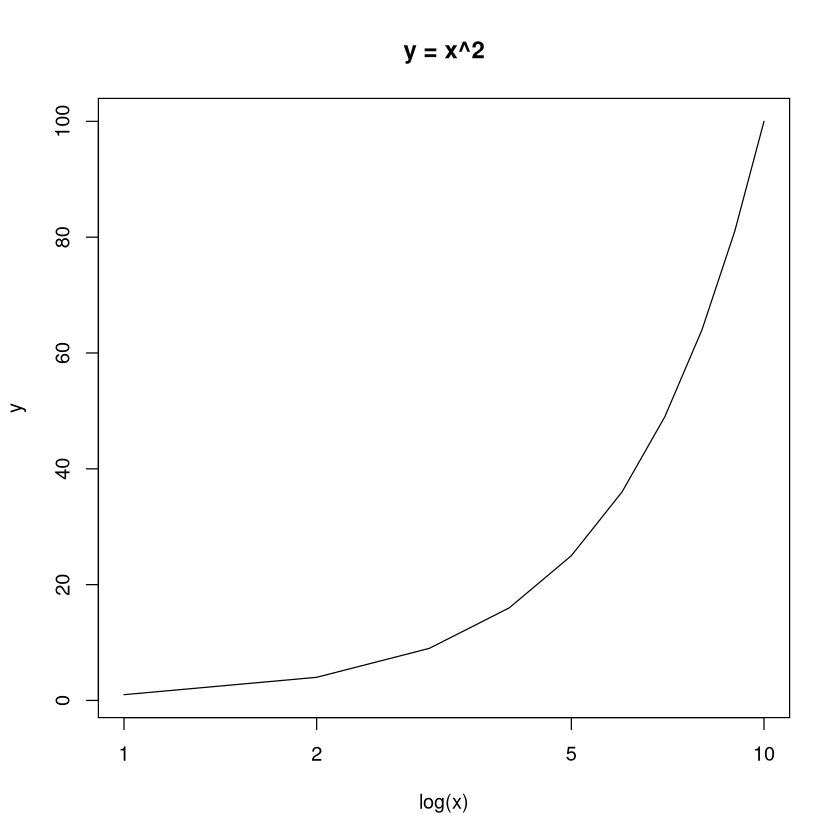

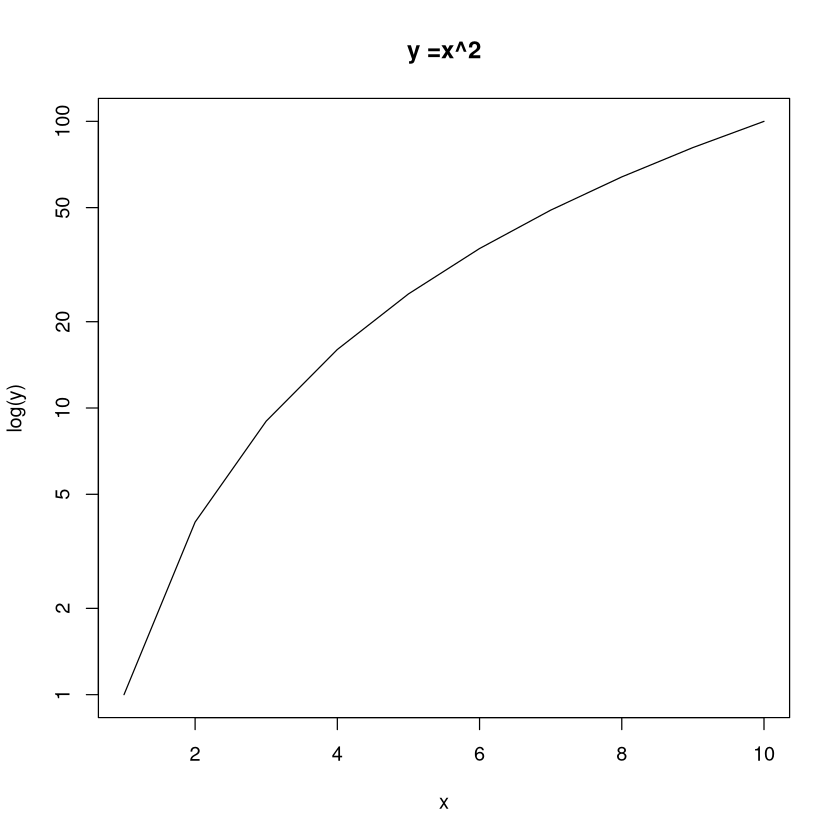

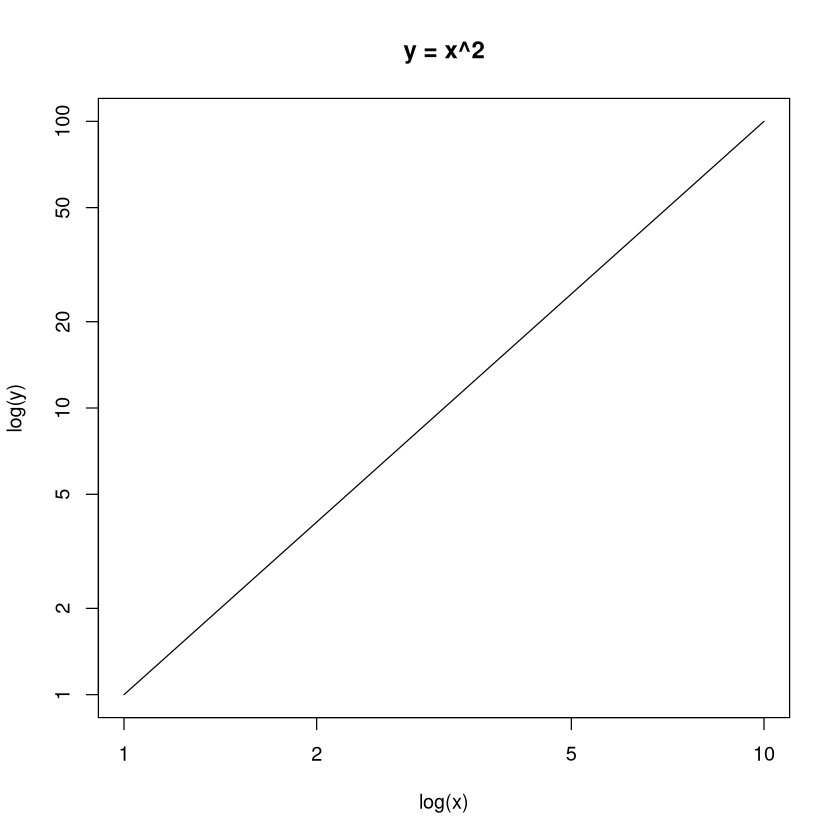

In [62]:
x = 1:10
y = lapply(x, power3)

plot(
    x, y, type = "l",
    main = "y = x^2"
)

plot(
    x, y, type = "l",
    main = "y = x^2",
    xlab = "log(x)",
    log = "x"
)

plot(
    x, y, type = "l",
    main = "y =x^2",
    ylab = "log(y)",
    log = "y"
)
plot(
    x, y, type = "l",
    main = "y = x^2",
    ylab = "log(y)",
    xlab = "log(x)",
    log = "xy"
)

### f)

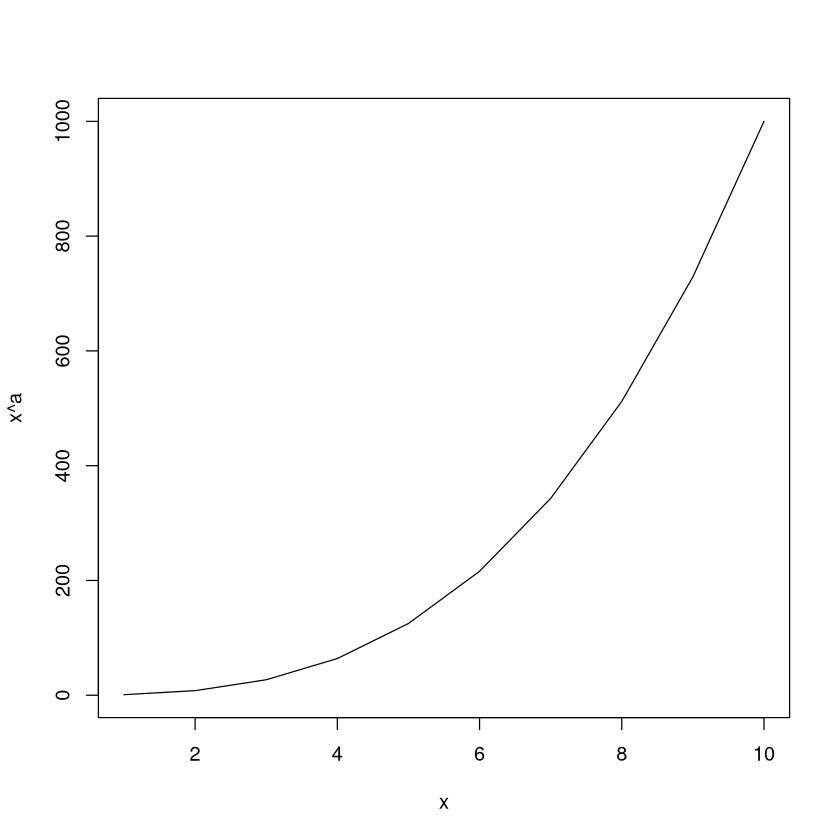

In [63]:
PlotPower = function(x, a)
{
    plot(x, x^a, type = "l")
}

PlotPower(1:10, 3)

# 13

### Сформируем отклик и немного изучим целевой набор данных

In [64]:
Boston$crim01 = rep(0, nrow(Boston))
Boston[Boston$crim > median(Boston$crim), "crim01"] = 1

head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [65]:
?Boston

Boston {MASS},R Documentation


### Немного изучим связи набора данных

Связи численных переменных с откликом

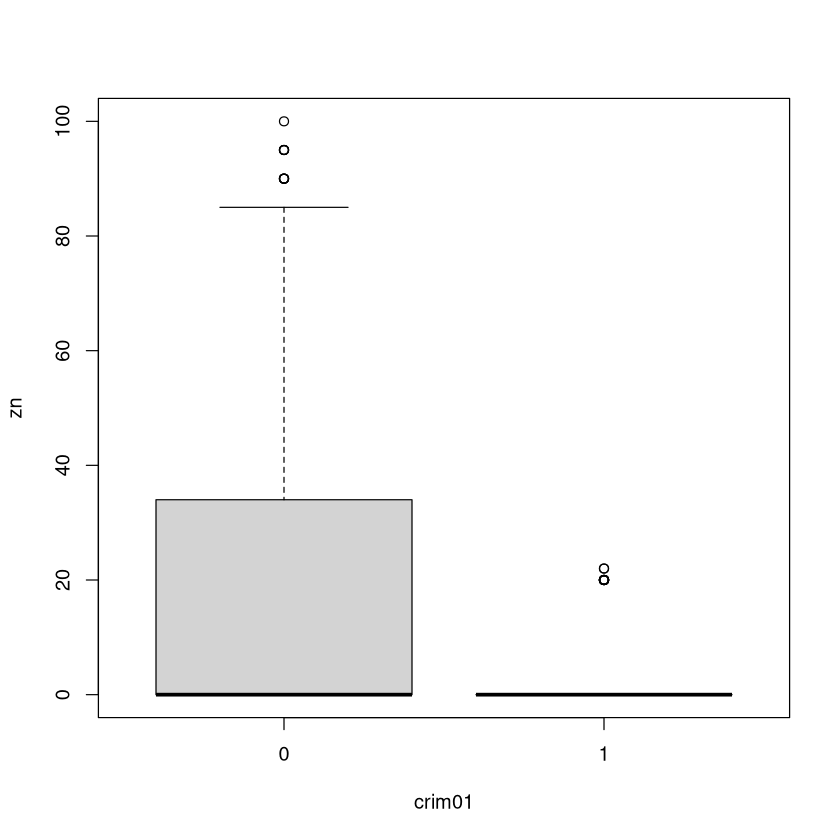

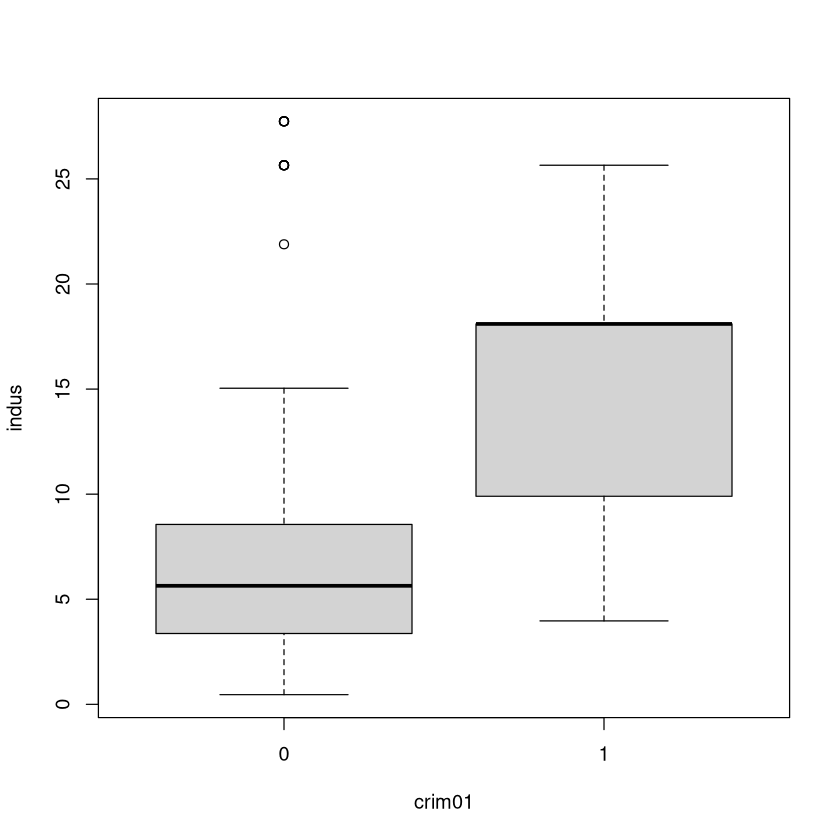

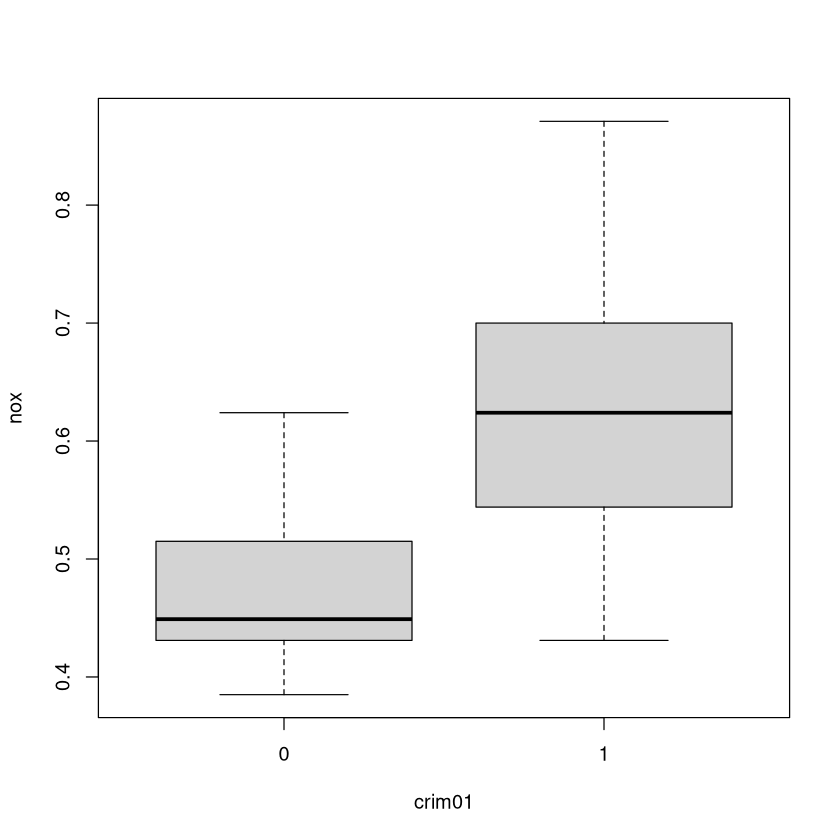

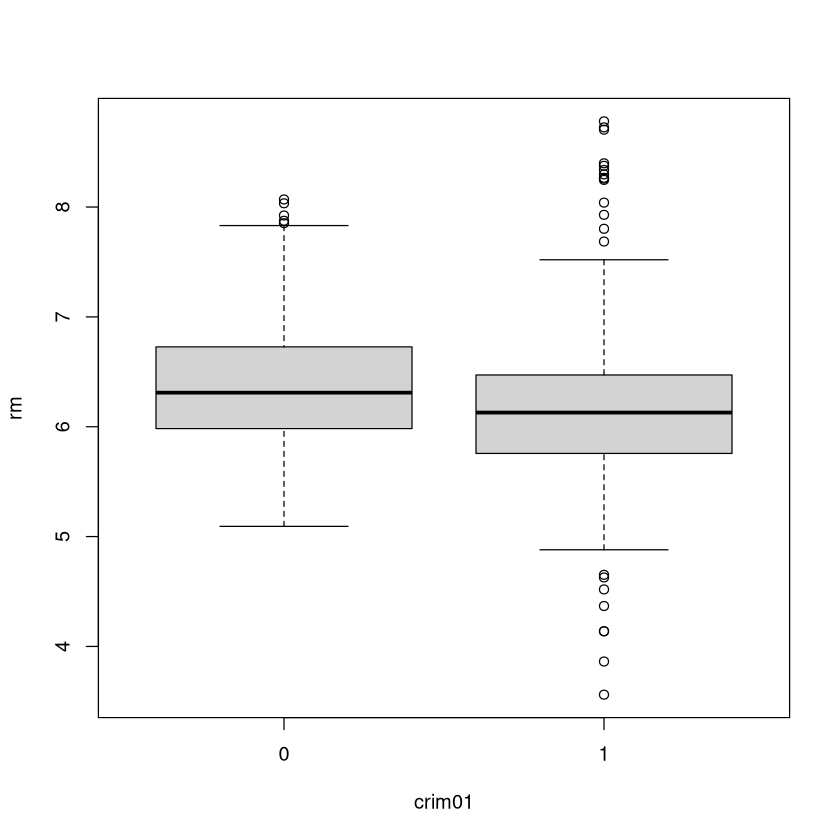

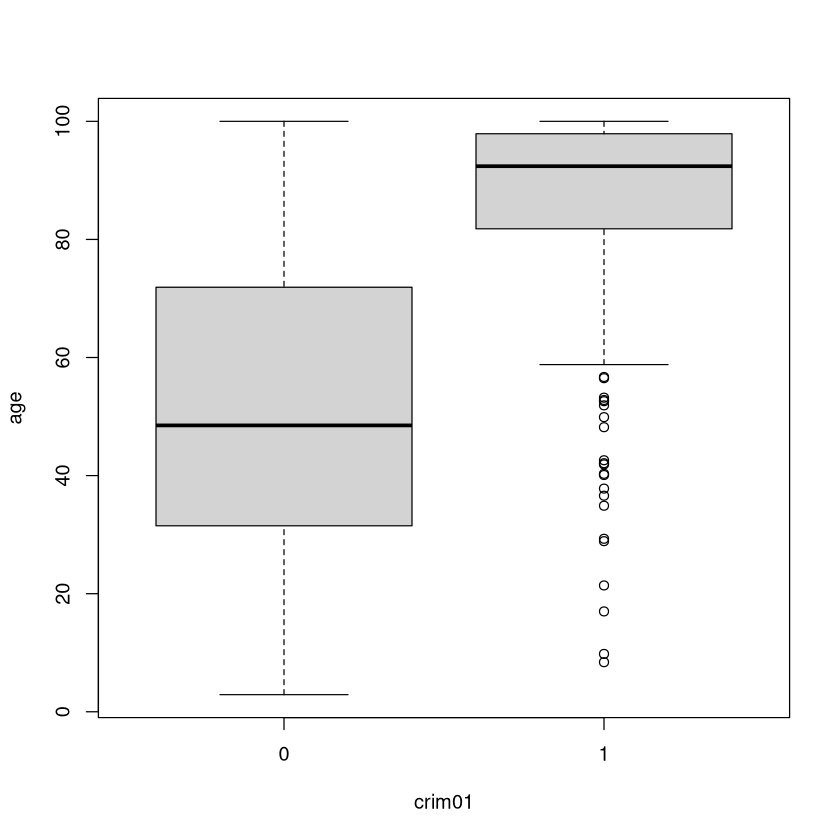

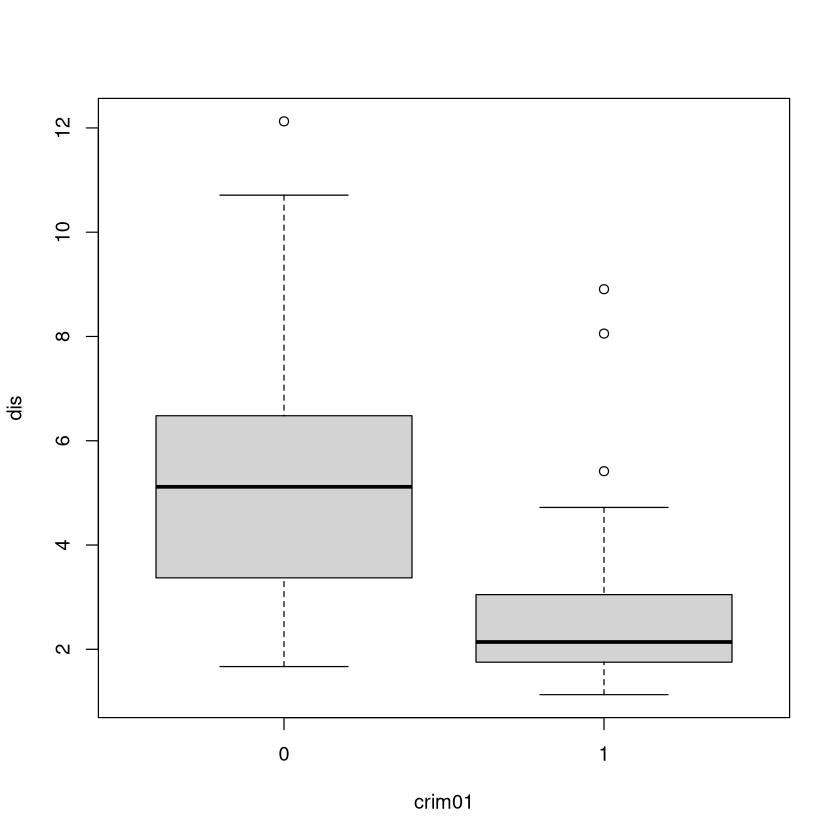

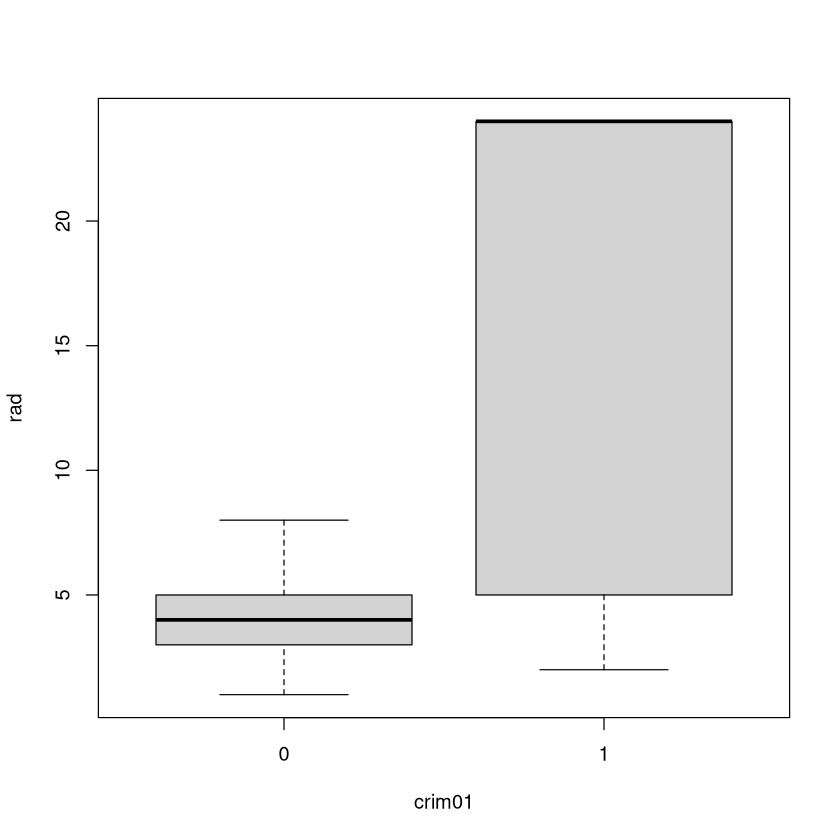

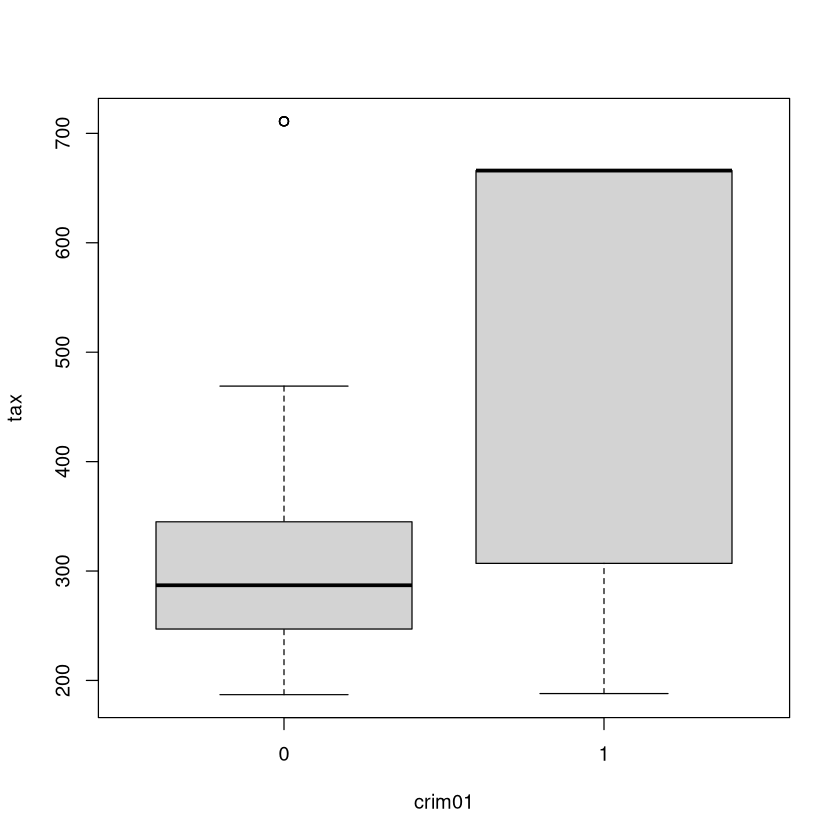

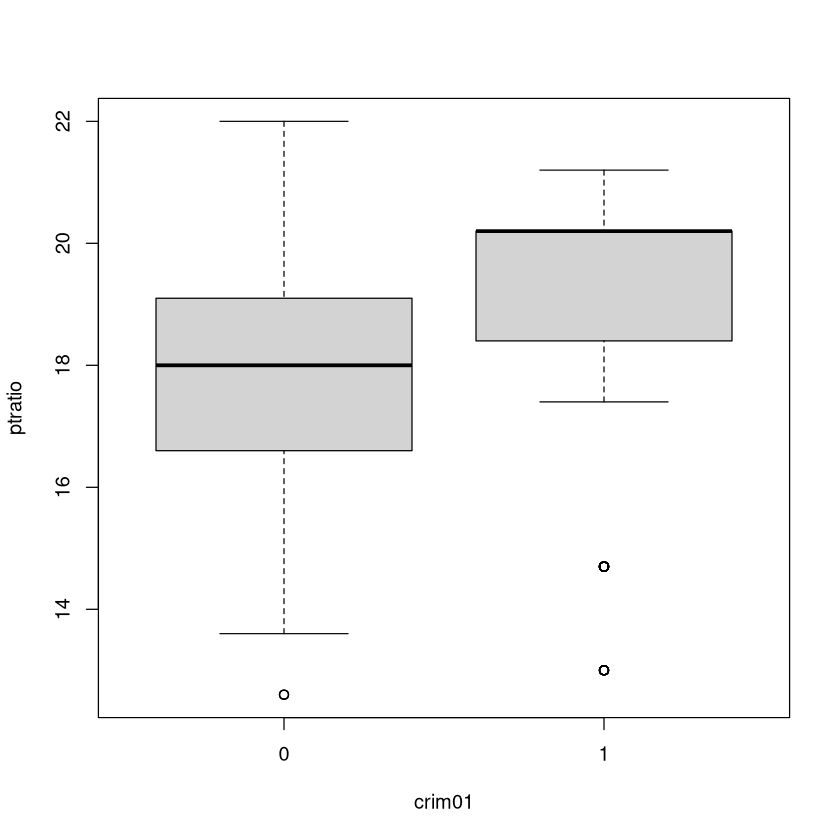

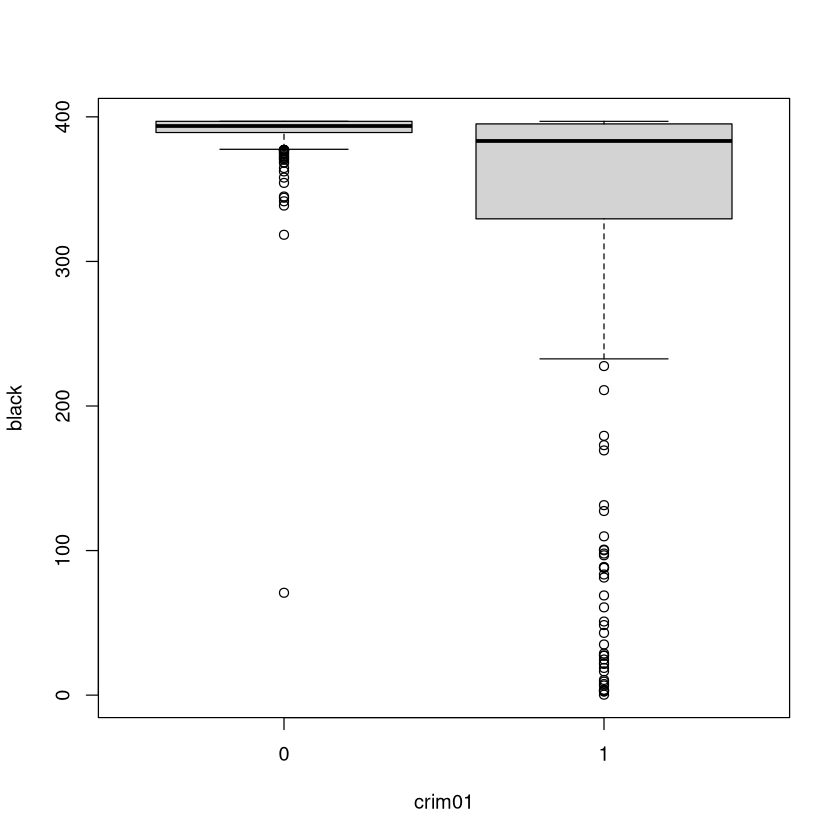

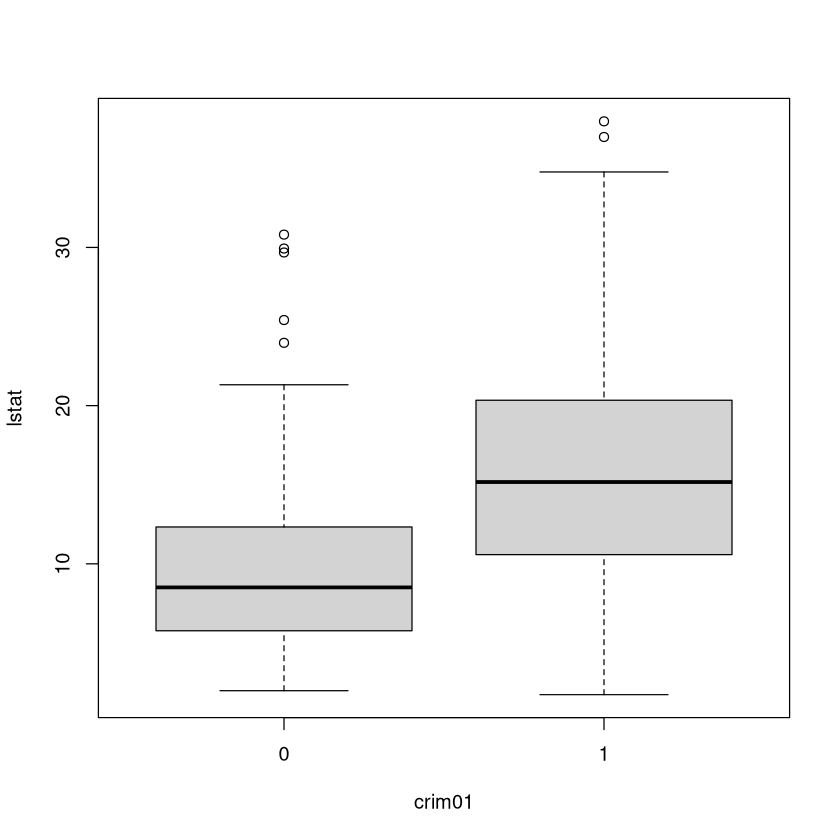

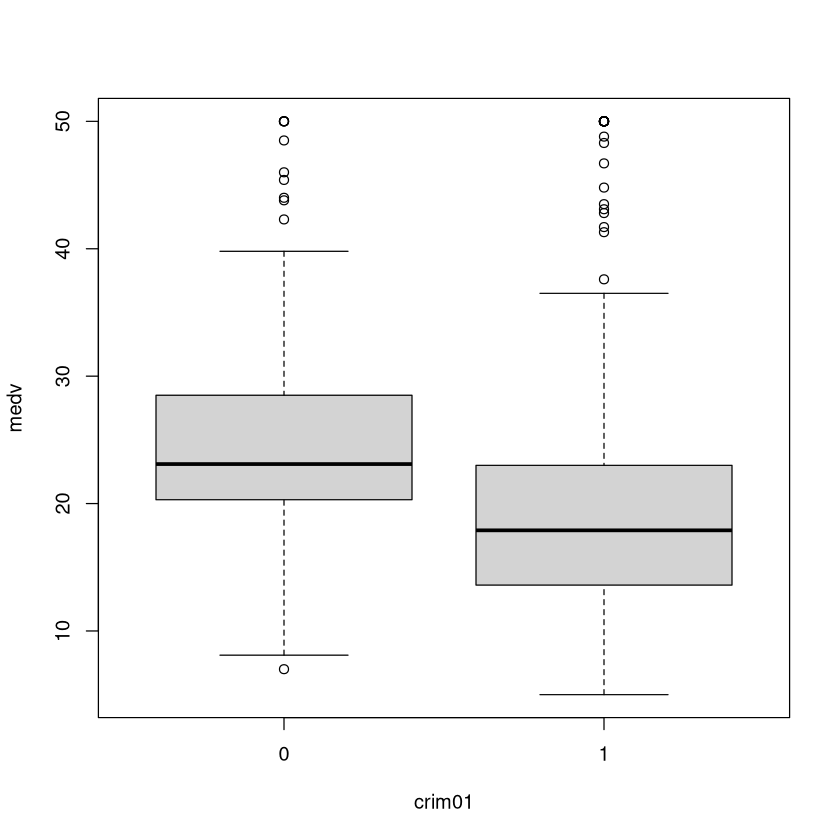

In [66]:
# Boston[,c("chas", "crim")]
num_cond = !names(Boston) %in% c("crim", "chas", "crim01")

for (col_name in names(Boston)[num_cond])
{
    boxplot(as.formula(paste(col_name, "~ crim01")), Boston)
}

имеется всего одна категориальная переменная `chas` - для нее табличка сопряженности

In [67]:
table(
    Boston$crim01,
    Boston$chas
)

   
      0   1
  0 240  13
  1 231  22

### Логистическая регрессия на всех показателях может помочь отобрать лучшие

In [68]:
logit.fit = glm(crim01 ~ . - crim, data = Boston, family = "binomial")
summary(logit.fit)
auc(Boston$crim01, predict(logit.fit, type = "response"))


Call:
glm(formula = crim01 ~ . - crim, family = "binomial", data = Boston)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3946  -0.1585  -0.0004   0.0023   3.4239  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -34.103704   6.530014  -5.223 1.76e-07 ***
zn           -0.079918   0.033731  -2.369  0.01782 *  
indus        -0.059389   0.043722  -1.358  0.17436    
chas          0.785327   0.728930   1.077  0.28132    
nox          48.523782   7.396497   6.560 5.37e-11 ***
rm           -0.425596   0.701104  -0.607  0.54383    
age           0.022172   0.012221   1.814  0.06963 .  
dis           0.691400   0.218308   3.167  0.00154 ** 
rad           0.656465   0.152452   4.306 1.66e-05 ***
tax          -0.006412   0.002689  -2.385  0.01709 *  
ptratio       0.368716   0.122136   3.019  0.00254 ** 
black        -0.013524   0.006536  -2.069  0.03853 *  
lstat         0.043862   0.048981   0.895  0.37052    
medv          0.167130   

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9722

Достаточно неплохой результат, а как на счет проверки качесва на тестовой выборке?

In [69]:
set.seed(20)

train_ind <- sample(
    seq_len(nrow(Boston)), 
    size = as.integer(nrow(Boston)*0.75)
)

train = Boston[train_ind, ]
test = Boston[-train_ind, ]

test.p_hat = predict(logit.fit, test, type = "response")
logit.fit = glm(crim01 ~ . - crim, train, family = "binomial")
summary(logit.fit)
auc(test$crim01, test.p_hat)


Call:
glm(formula = crim01 ~ . - crim, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8454  -0.1421   0.0000   0.0023   3.3968  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -29.623100   8.364337  -3.542 0.000398 ***
zn           -0.070396   0.038762  -1.816 0.069349 .  
indus        -0.056329   0.055134  -1.022 0.306935    
chas          0.957566   0.790544   1.211 0.225790    
nox          48.185526   9.098654   5.296 1.18e-07 ***
rm           -0.369312   0.839578  -0.440 0.660025    
age           0.022811   0.014766   1.545 0.122381    
dis           0.636421   0.255984   2.486 0.012913 *  
rad           0.663164   0.172540   3.844 0.000121 ***
tax          -0.005987   0.003016  -1.985 0.047119 *  
ptratio       0.452666   0.154580   2.928 0.003408 ** 
black        -0.027138   0.012428  -2.184 0.028987 *  
lstat        -0.011470   0.060882  -0.188 0.850570    
medv          0.156638   0

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9713

Вообще говоря на тестовых данных достигается достаточно хорошее качество модели!
Попробуем теперь подобрать точку отсечения и получить матрицу неточностей.

          predicted class
real class  0  1
         0 64  5
         1  3 55

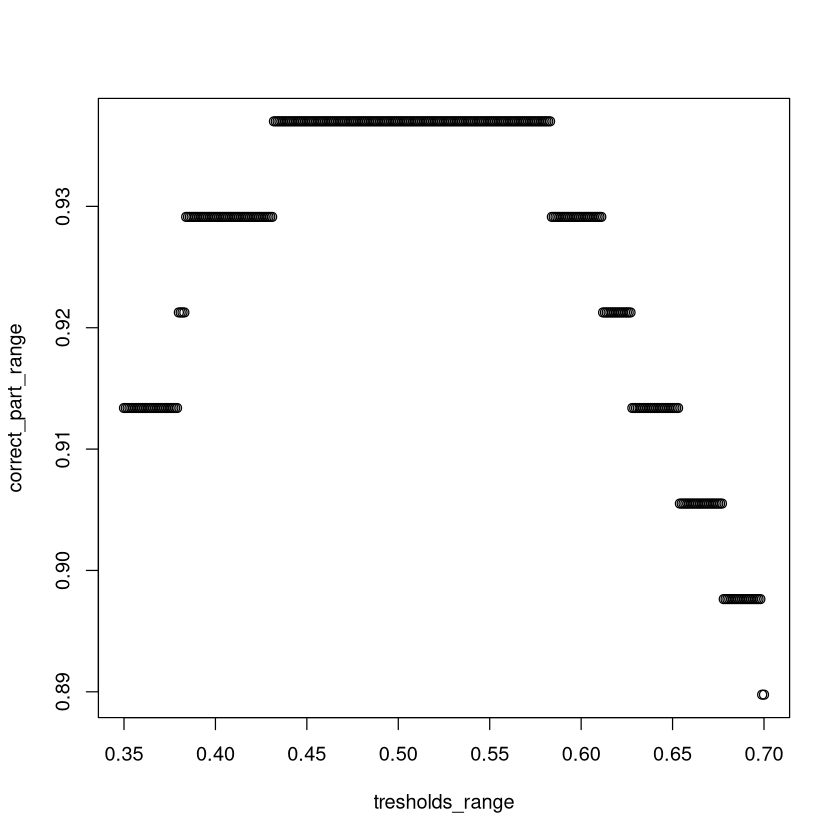

In [70]:
tresholds_range = seq(0.35, 0.7, 0.001)

correct_part_range = lapply(tresholds_range, function(x) {
    get_correct_part(
        table(test$crim01, get_y_hat(test.p_hat, x))
    )
})

plot(tresholds_range, correct_part_range)
table(
    test$crim01, 
    get_y_hat(test.p_hat, 0.5),
    dnn = c("real class", "predicted class")
)

И так 94 процента тестовой выборки предсказано верно!

### Logit на самых значимых показателях

На основании двух прошлых моделей попробуем рассмотреть самые значимые из показателей

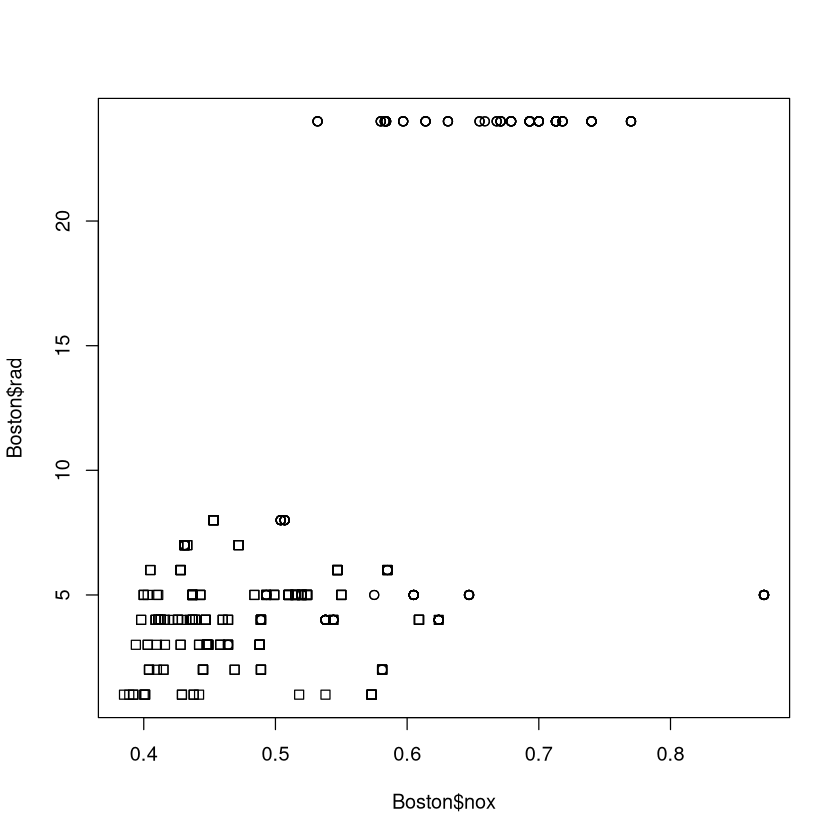

In [71]:
plot(Boston$nox, Boston$rad, pch = Boston$crim01)

Логит регрессия на этих данных

In [72]:
logit.model2 = glm(crim01 ~ nox + rad, train, family = "binomial")
summary(logit.model2)

p_hat = predict(logit.model2, test, type = "response")
auc(test$crim01, p_hat)


Call:
glm(formula = crim01 ~ nox + rad, family = "binomial", data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03939  -0.34025   0.00029   0.00450   2.54084  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -18.1288     2.2298  -8.130 4.28e-16 ***
nox          28.7037     3.7134   7.730 1.08e-14 ***
rad           0.5409     0.1157   4.677 2.91e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 525.09  on 378  degrees of freedom
Residual deviance: 200.53  on 376  degrees of freedom
AIC: 206.53

Number of Fisher Scoring iterations: 8


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9618

          predicted class
real class  0  1
         0 65  4
         1 11 47

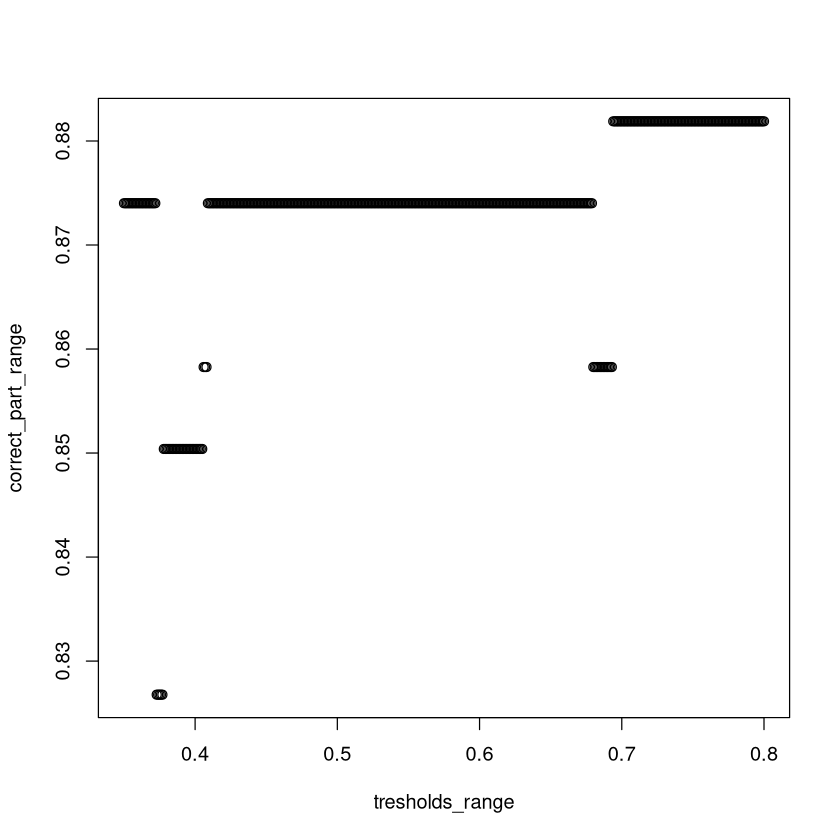

In [73]:
tresholds_range = seq(0.35, 0.8, 0.001)

correct_part_range = lapply(tresholds_range, function(x) {
    get_correct_part(
        table(test$crim01, get_y_hat(p_hat, x))
    )
})

plot(tresholds_range, correct_part_range)

table(
    test$crim01, 
    get_y_hat(p_hat, 0.7),
    dnn = c("real class", "predicted class")
)

Итак получается, что только на этих покзателях можно добиться почти такой же точности классификации как и на всех показателях! Но мне кажется целесообразным рассмотреть в каких случаях модель таки ошиблась и поискать переменную, которая позволит найти различия и в этих наблюдениях. Но это наверное лучше делать изучая полную выборку.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.9588

          predicted class
real class   0   1
         0 233  20
         1  44 209

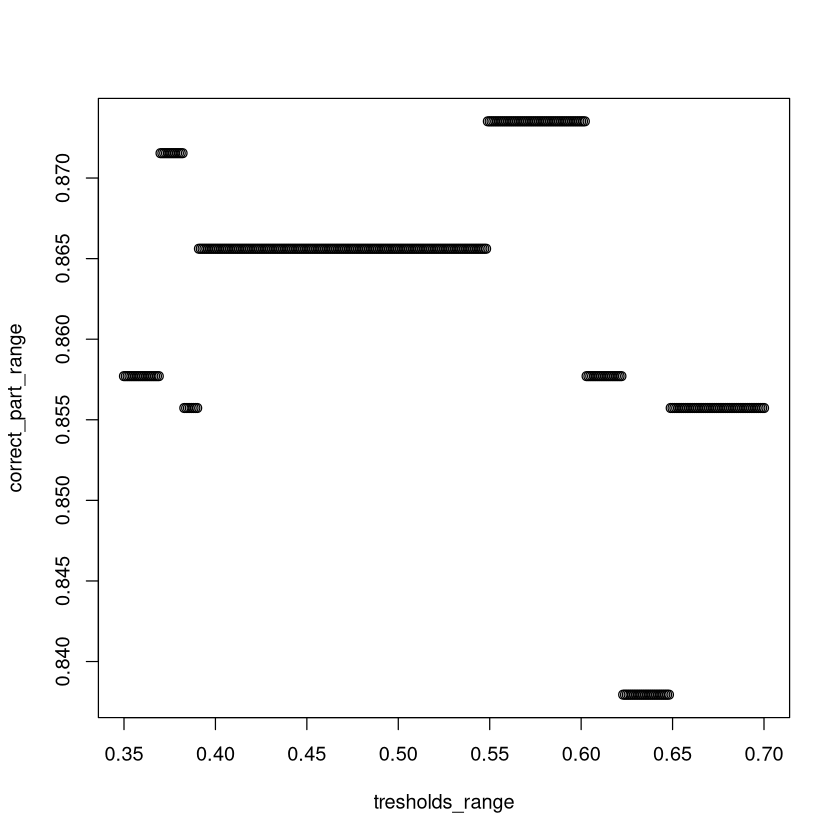

In [74]:
logit.fit3 = glm(crim01 ~ nox + rad, Boston, family = "binomial")
p_hat = predict(logit.fit3, Boston, type = "response")

auc(Boston$crim01, p_hat)

tresholds_range = seq(0.35, 0.7, 0.001)

correct_part_range = lapply(tresholds_range, function(x) {
    get_correct_part(
        table(Boston$crim01, get_y_hat(p_hat, x))
    )
})
plot(tresholds_range, correct_part_range)

y_hat = get_y_hat(p_hat, 0.57)

table(
    Boston$crim01, y_hat,
    dnn = c("real class", "predicted class")
)

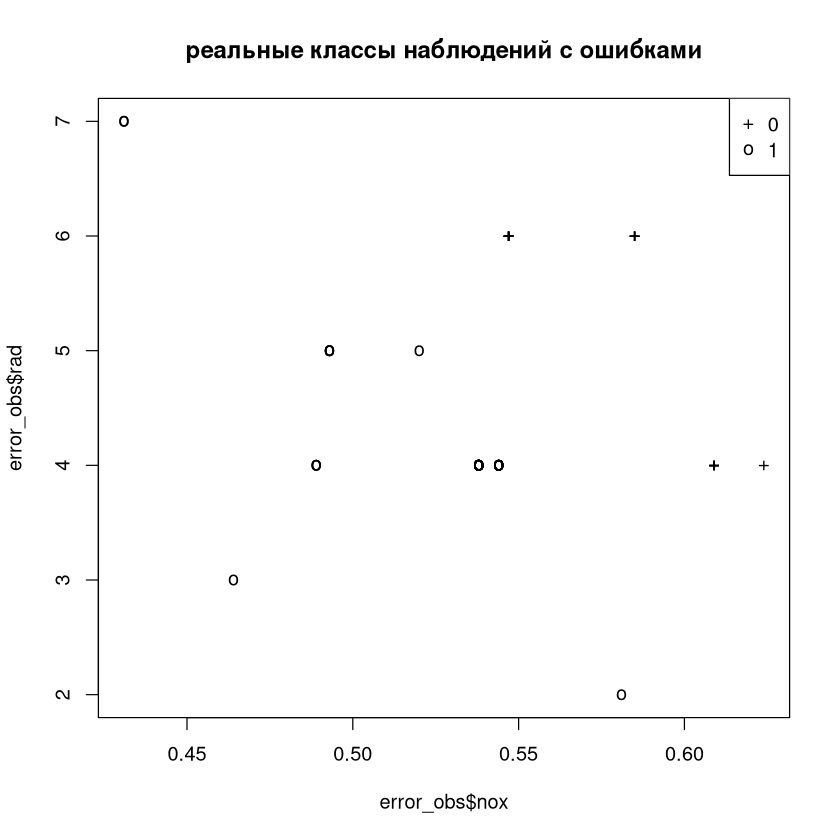

In [75]:
error_obs = Boston[!(y_hat == Boston$crim01),]

plot(
    error_obs$nox, 
    error_obs$rad,
    pch=c("+","o")[error_obs$crim01 + 1],
    main = "реальные классы наблюдений с ошибками"
)

legend(x="topright", legend = c(0, 1), pch = c("+","o"))

Получается, там где 0 там по ошибке сказали что не преступный регион, + наоборот. <br>
И так будем пребирать переменные и попробуем подобрать те, что выделят позволят разделить ошибочные наблюдения

### KNN на двух лучших покзателях

Подберем k опираясь на лучший AUC на тестовой выборке

[1] "Максимальный AUC достигается в точке  25"


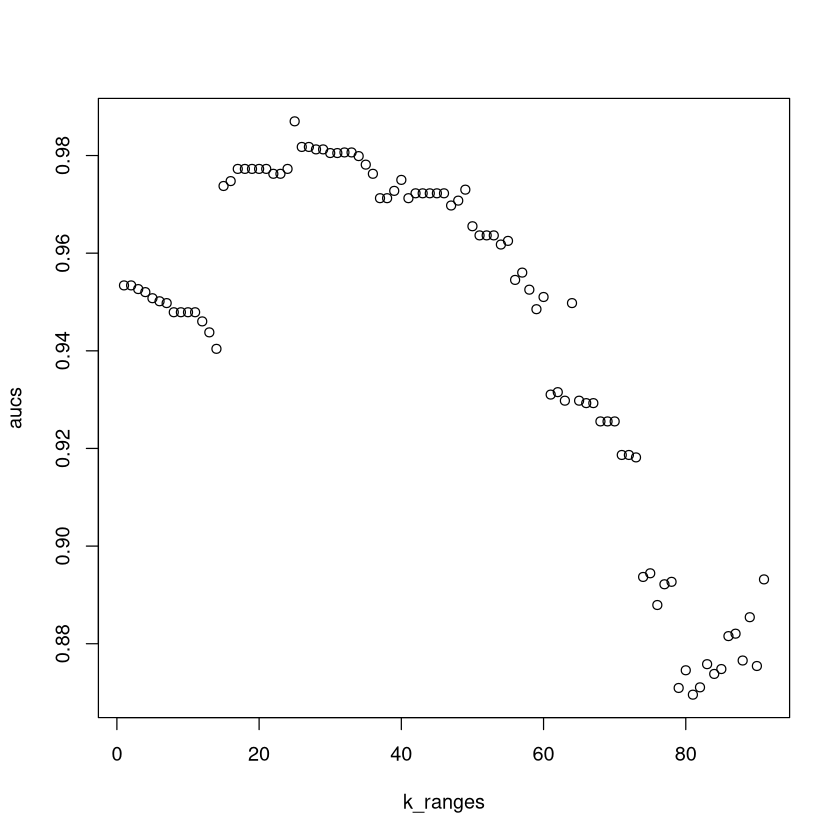

In [76]:
aucs = c()
k_ranges = 1:91

features_vector = c("nox", "rad")

for (k in k_ranges)
{
    knn.predict = predict(
                        caret::knn3(
                            train[features_vector], as.factor(train$crim01), k = k
                        ), 
                        test[features_vector]
                    )[,2]

    aucs = c(
        aucs, 
        auc(
            test$crim01,
            knn.predict,
            quiet = TRUE
        )
    )
    
}

plot(k_ranges, aucs)
print(
    paste("Максимальный AUC достигается в точке ", 
    as.character(argmax(as.matrix(aucs), rows = FALSE)))
)

Посмотрим модель с $k = 25$

train/test

In [121]:
set.seed(6)
knn.test.predict = knn(train[features_vector], test[features_vector], train$crim01)

table(
    test$crim01,
    knn.test.predict
)

   knn.test.predict
     0  1
  0 63  6
  1  4 54

Общая выборка

In [117]:
set.seed(5)
knn.predict = knn(Boston[features_vector], Boston[features_vector], Boston$crim01)

table(
    Boston$crim01,
    knn.predict
)

   knn.predict
      0   1
  0 250   3
  1   2 251

Рассмотрим случаи ошибки

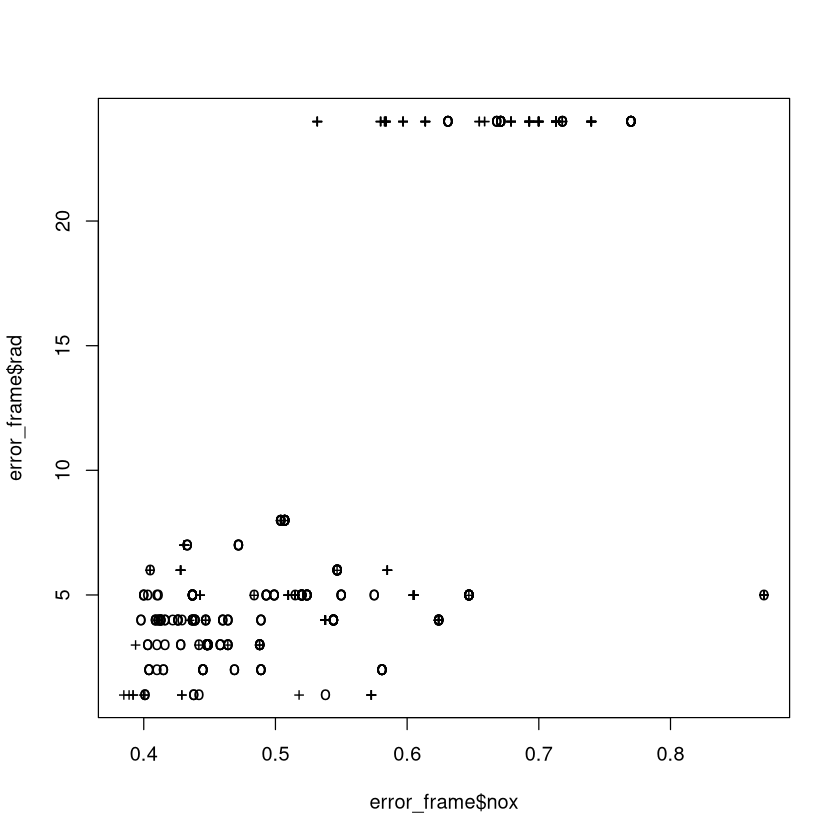

In [87]:
error_cond = knn.predict == Boston$crim01
error_frame = Boston[error_cond, ]

plot(error_frame$nox, error_frame$rad, pch = c("o", "+")[Boston$crim01 + 1])

Ошибки, как и ожидалось, сильно перемешаны по переменным включенным в модель - следует посмотреть как они распеделяться вдоль других осей!

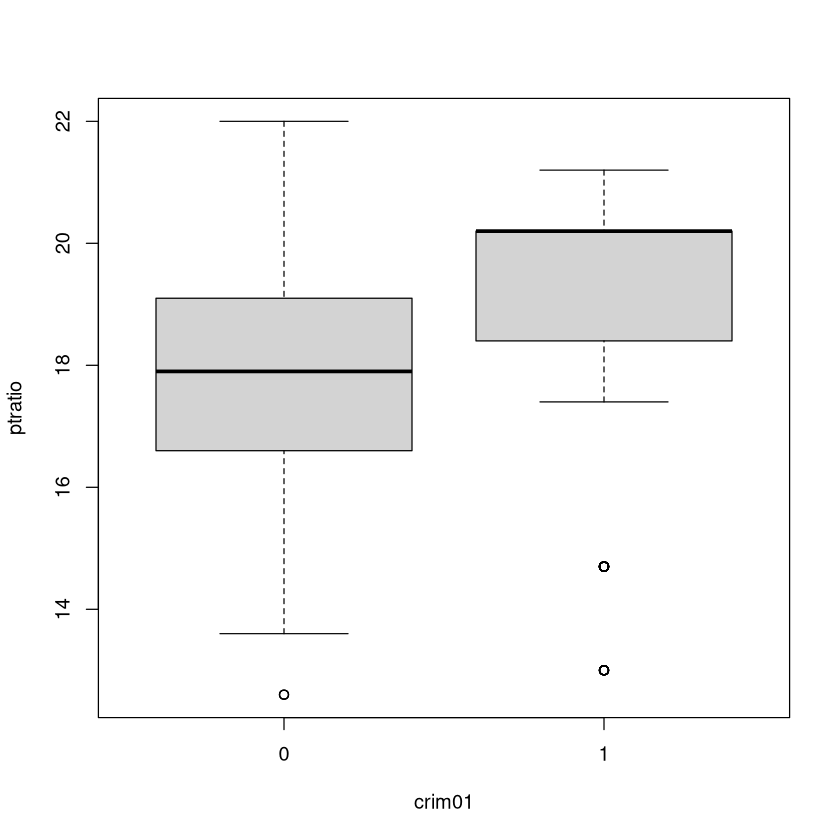

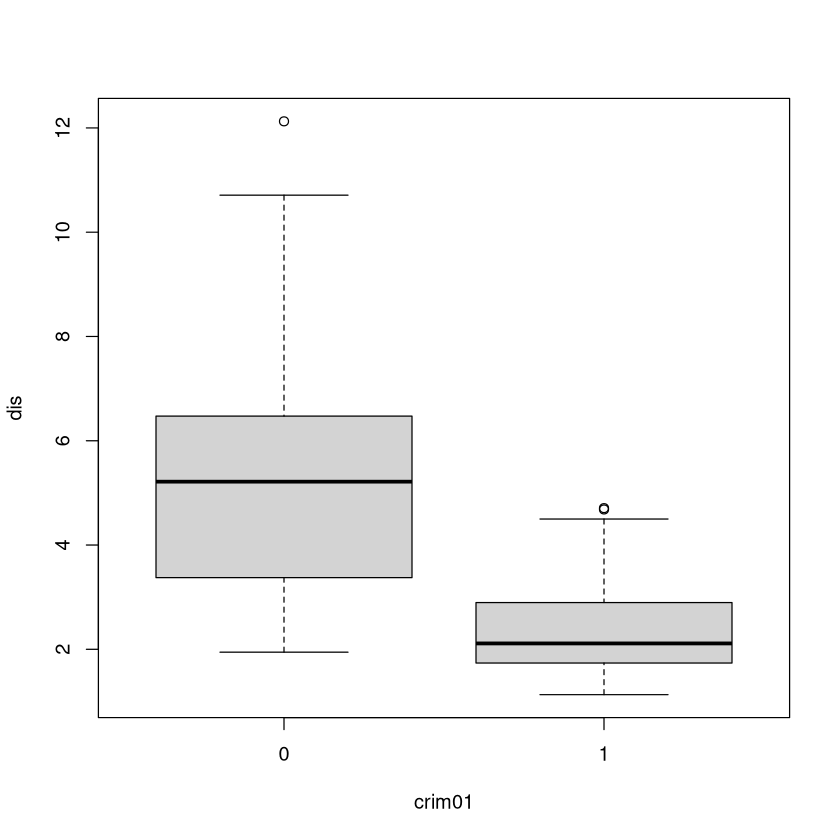

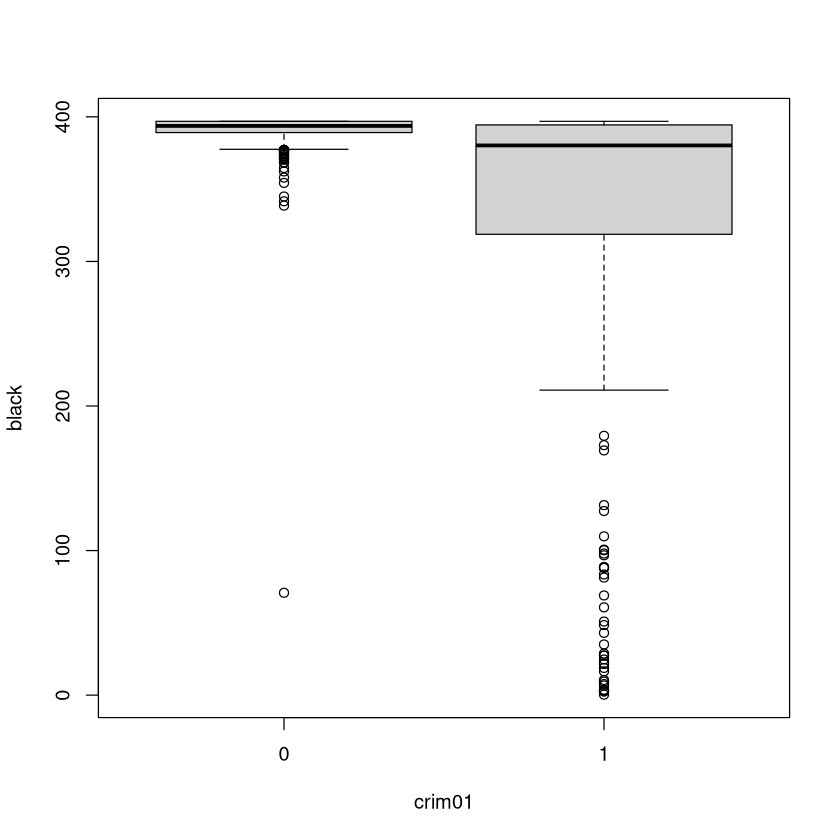

In [90]:
boxplot(ptratio~crim01, error_frame)
boxplot(dis~crim01, error_frame)
boxplot(black~crim01, error_frame)

### Добавление dis



[1] "Максимальный AUC достигается в точке  24"


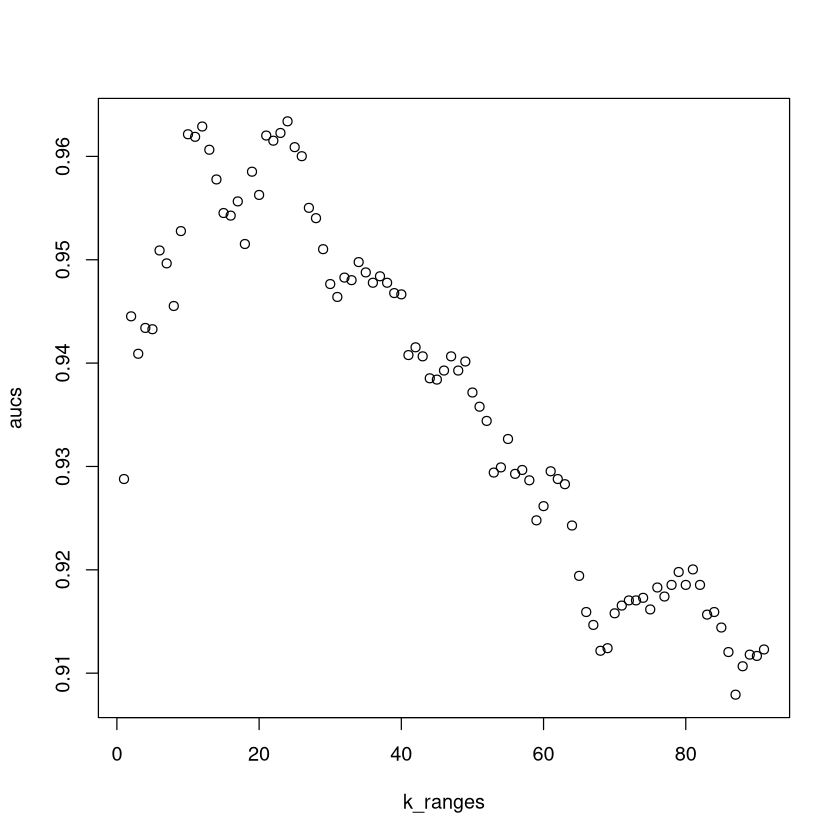

In [91]:
aucs = c()
k_ranges = 1:91

features_vector = c("nox", "rad", "dis")

for (k in k_ranges)
{
    knn.predict = predict(
                        caret::knn3(
                            train[features_vector], as.factor(train$crim01), k = k
                        ), 
                        test[features_vector]
                    )[,2]

    aucs = c(
        aucs, 
        auc(
            test$crim01,
            knn.predict,
            quiet = TRUE
        )
    )
    
}

plot(k_ranges, aucs)
print(
    paste("Максимальный AUC достигается в точке ", 
    as.character(argmax(as.matrix(aucs), rows = FALSE)))
)

AUC вообще говоря упал! Проклятие размерности! Но всеже вижу смысл посмотреть, что получилось

In [114]:
set.seed(1)

knn3.test.predict = knn(train[features_vector], test[features_vector], train$crim01)
knn3.full.predict = knn(Boston[features_vector], Boston[features_vector], Boston$crim01)

table(knn3.test.predict, test$crim01)
table(knn3.full.predict, Boston$crim01)

                 
knn3.test.predict  0  1
                0 63  4
                1  6 54

                 
knn3.full.predict   0   1
                0 251   3
                1   2 250

**На**